# Stroke Risk Prediction Model: Johns Hopkins Hospital

## Introduction

### Background

In this project I will explore dataset designed to identify stroke risk in patients. Stroke is a major global health concern, ranking as the second leading cause of death worldwide. It is also a leading cause of disability. Annually, millions experience strokes, and a significant number of these result in death. After data exploration and analysis, I will build, train and deploy a model which could predict whether patients is likely to have stroke or not, based on parameters like age, gender, lifestyle choices, bmi and so on. 

### Problem

It’s hard to spot which patients are at high risk of stroke, making it tough to catch it early and prevent it.

### Goal

To build a model that helps doctors spot patients at higher risk of stroke early so they can take action and help prevent deaths.

### Hypotheses

4 hypotheses I want to explore:

1. Older age increases likelyhood of stroke.
- **H₀:** Age is not associated with stroke risk.
- **H₁:** Increasing age is associated with higher stroke risk

2. Males are more likely to have a stroke than females.
- **H₀:** Gender has no effect on stroke risk.
- **H₁:** Male patients have a higher probability of experiencing a stroke than female patients.

3. Obesity increases risk of a stroke.
- **H₀:** BMI is not associated with stroke risk.
- **H₁:** Higher BMI is associated with an increased likelihood of stroke.

4. Having a hypertension increases chances of having a stroke
- **H₀:** Hypertension is not associated with stroke risk.
- **H₁:** Patients with hypertension have higher odds of experiencing a stroke.

### Scope

The analysis scope includes :

- Data cleaning and preparation.
- Descriptive analysis of patient demographics and health indicators.
- Formulation and testing of clear, interpretable hypotheses about risk factors.
- Development of various  models to predict stroke likelihood.
- Interpretation of results to inform potential early intervention strategies.

The project is limited to the variables available in the provided dataset and does not incorporate external medical records or real-time clinical data. The findings are intended for educational and exploratory purposes and do not replace professional medical advice.

### Evaluation Metrics

**Main Evaluation Metric:** Macro F1 Score. Balances precision and recall across classes to ensure fair assesment of performance on both stroke and non-strokes case in an imbalanced dataset.

**Secondary Evaluation Metrics:**
- Recall. Measures the ability to correctly indentify true stroke cases.
- Precision. Assesses how many predicted stroke cases are actually correct.
- ROC-AUC. It evaluates the model's ability to distinquish betweeen strokes and non-stroke cases.
- Confusion Matrix. Provides detailed breakdown of correct and incorrect predictions.

## Data Overview and Splitting

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.lines as mlines
from phik import phik_matrix

### Data Source and Loading the Data

Data source is Kaggle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download

Loading the data and making a copy of it:

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df = data.copy()

### Feature Definitions

- **id**: Unique patient identifier (integer).  
- **gender**: Patient gender (Male, Female, or Other).  
- **age**: Patient age in years (float).  
- **hypertension**: Binary indicator of hypertension (0 = No, 1 = Yes).  
- **heart_disease**: Binary indicator of heart disease (0 = No, 1 = Yes).  
- **ever_married**: Marital status (Yes/No).  
- **work_type**: Type of employment (e.g., Private, Self-employed, Govt_job, Children, Never_worked).  
- **Residence_type**: Urban or Rural residence.  
- **avg_glucose_level**: Average blood glucose level (float).  
- **bmi**: Body Mass Index (float).
- **smoking_status**: Smoking status (Never smoked, Formerly smoked, Smokes, Unknown).  
- **stroke**: Target variable indicating stroke occurrence (0 = No, 1 = Yes).

### General Data Overview

Checking the columns:

In [4]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

The ID column is unnecessary and provides no value, I can drop it:

In [5]:
df.drop(columns=["id"], inplace=True)

Checking the shape of the dataset:

In [6]:
df.shape

(5110, 11)

Previewing the tail of the data set:

In [7]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


**Interpretation:** Sample data shows varied patient details with some missing BMI values and cathegorical features needing encoding.

In [8]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Interpretation:** 

- Numerical features show wide ranges: age spans from infancy to 82, average glucose levels and BMI have high variability.

- Stroke prevalence is low, about 5%, suggesting that there's class imbalance.

- Again confirmed that BMI has missing values.

### Splitting the Data

I will split data early to avoid data leakage.

Defining features and target:

In [9]:
X = df.drop("stroke", axis=1)
y = df["stroke"]

Splitting into training and testing sets:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Confirming shapes:

In [11]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (3577, 10)
Testing set size: (1533, 10)


**Interpretation:** I splitted data to 70/30 instead of 80/20, to ensure sufficient stroke cases in the test set for evaluation, adressing the class imbalance, dataset size and possibly improving the reliability of performance metrics.

## Data Cleaning (Training Data)

Checking columns:

In [12]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Lowering all capital letters for consistency:

In [13]:
df.columns = df.columns.str.lower()

Checking for duplicates:

In [14]:
df.duplicated().sum()

np.int64(0)

Confirming missing values:

In [15]:
df.isnull().sum().sum()

np.int64(201)

In [16]:
df[df["bmi"].isnull()].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,201.000000,201.000000,201.000000,201.000000,0.0,201.000000
mean,52.049154,0.233831,0.164179,126.724627,NaN,0.199005
std,22.276181,0.424323,0.371363,59.240322,NaN,0.400249
min,0.480000,0.000000,0.000000,57.520000,NaN,0.000000
25%,37.000000,0.000000,0.000000,81.430000,NaN,0.000000
50%,58.000000,0.000000,0.000000,99.870000,NaN,0.000000
75%,71.000000,0.000000,0.000000,191.790000,NaN,0.000000
max,82.000000,1.000000,1.000000,260.850000,NaN,1.000000


**Interpretation:** Exploration shows BMI is more often missing in older, higher-risk patients. To reduce bias, median imputation within age groups will be applied instead of single global median.

Binning age into groups:

In [17]:
age_bins = [0, 1, 4, 12, 19, 39, 59, 64, 120]
age_labels = [
    "Infant",
    "Toddler",
    "Child",
    "Teen",
    "Young Adult",
    "Middle-Aged Adult",
    "Senior Adult",
    "Elderly",
]

Creating age_group column:

In [18]:
df["age_group"] = pd.cut(
    df["age"], bins=age_bins, labels=age_labels, right=True, include_lowest=True
)

Imputing BMI withing age groups:

In [19]:
df["bmi"] = df.groupby("age_group", observed=False)["bmi"].transform(
    lambda x: x.fillna(x.median())
)

Confirming the change:

In [20]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_group'],
      dtype='object')

Confirming there no missing values left:

In [21]:
df.isnull().sum().sum()

np.int64(0)

**Interpretation:** 

- Age was binned into clinically meaningful groups and new column of age group was created. 

- Missing BMI values were impurted using the median BMI withing each age group to reduce bias and reflect age-specific health profiles.

Checking distribution of genders:

In [22]:
df["gender"].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Since there is only 1 record of Other gender, I will delete it since it gives me not enough data to learn patterns:

In [23]:
df = df[df["gender"].isin(["Male", "Female"])]

Confirming changes:

In [24]:
df["gender"].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

Checking the amount of 'Unknown' answer in Smoking column:

In [25]:
print(df["smoking_status"].value_counts(dropna=False))

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64


It's 2nd largest answer group and it's not empty value, so I will treat it as separate category.

### Outliers

Defining numerical columns:

In [26]:
num_cols = ["age", "avg_glucose_level", "bmi"]

Visualizing it in a boxplots:

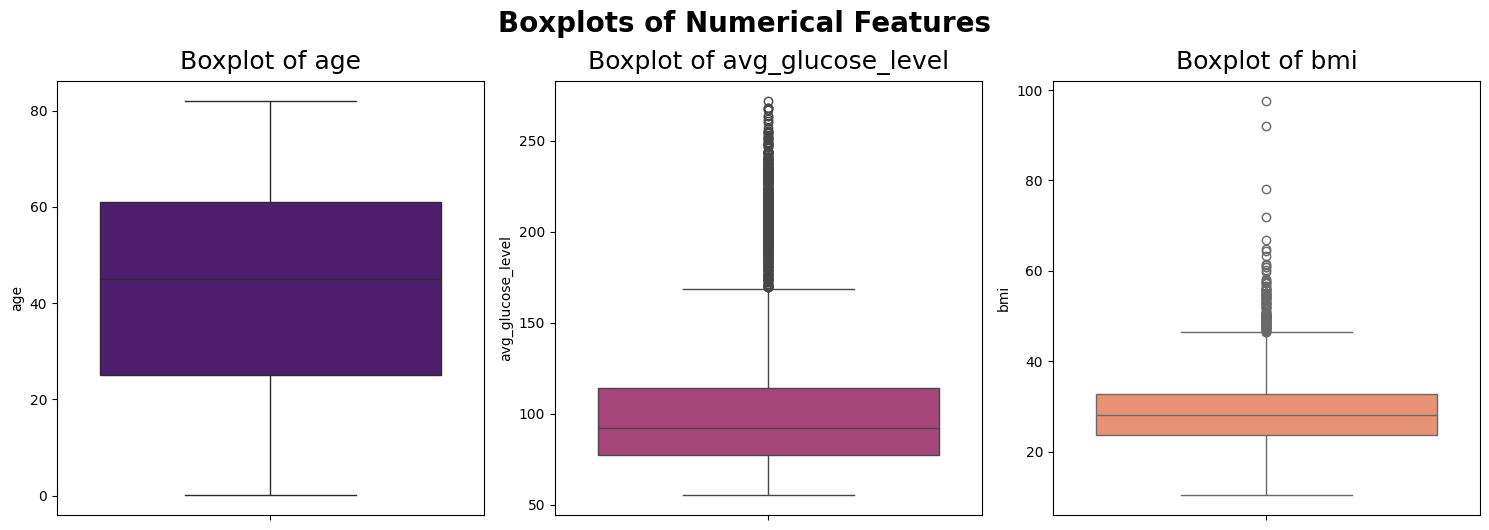

In [27]:
colors = sns.color_palette("magma", n_colors=3)

plt.figure(figsize=(15, 5))
for i, (col, color) in enumerate(zip(num_cols, colors), 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color=color)
    plt.title(f"Boxplot of {col}", fontsize=18, y=1.01)

plt.tight_layout()
plt.suptitle("Boxplots of Numerical Features", fontsize=20, y=1.05, weight="bold")
plt.show()

**Interpretation:** 

- Age feature does not have extreme outliers, 

- BMI and average glucose level has some way higher values than usual, which could be considerable outliers. 

- BMI >60–70 is possible but extremely rare.

- Avg glucose has extreme high outliers (250+)








Logging average glucose values:

In [28]:
df["avg_glucose_level_log"] = np.log(df["avg_glucose_level"])

Capping BMI:

In [29]:
upper_limit_bmi = df["bmi"].quantile(0.99)
df["bmi_capped"] = np.where(df["bmi"] > upper_limit_bmi, upper_limit_bmi, df["bmi"])

In [30]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_group', 'avg_glucose_level_log',
       'bmi_capped'],
      dtype='object')

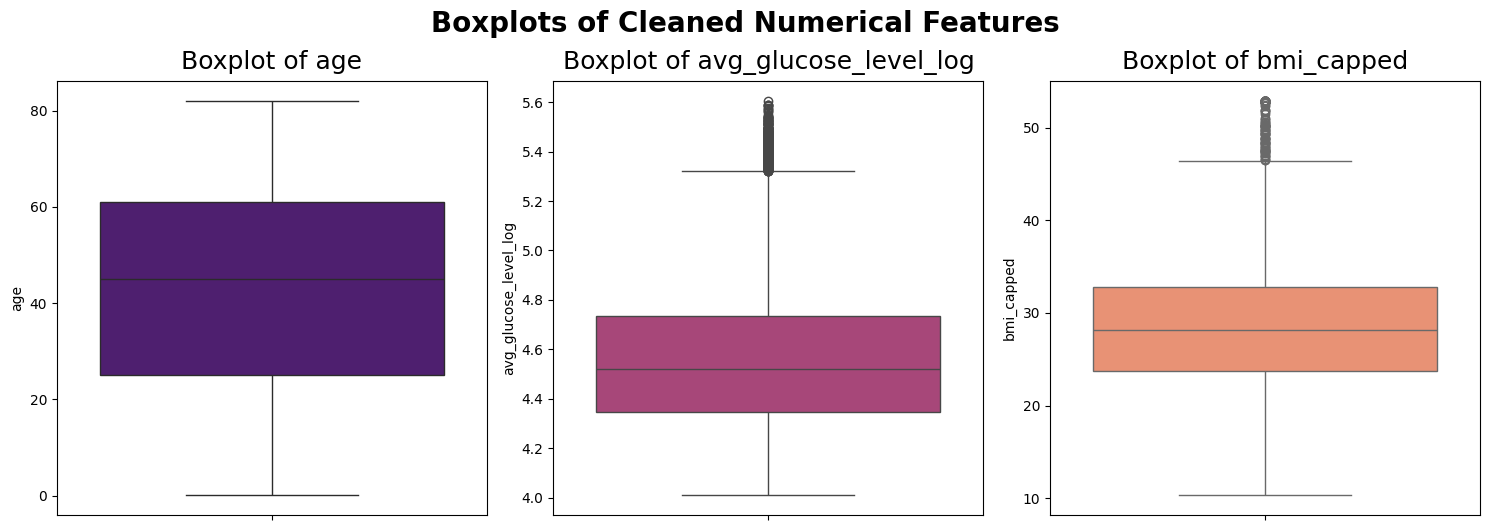

In [31]:
num_cols = ["age", "avg_glucose_level_log", "bmi_capped"]

colors = sns.color_palette("magma", n_colors=3)

plt.figure(figsize=(15, 5))
for i, (col, color) in enumerate(zip(num_cols, colors), 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color=color)
    plt.title(f"Boxplot of {col}", fontsize=18, y=1.01)

plt.tight_layout()
plt.suptitle(
    "Boxplots of Cleaned Numerical Features", fontsize=20, y=1.05, weight="bold"
)
plt.show()

**Interpretation:** 

- Outliers successfully dealt with. 

- BMI was capped at 99% percentile limit to lower the influence of extreme outliers and preserve interprebility.

- To preserve relative difference avg_glucose values were logged to reduce skewness.

### Cathegorical Encoding Plan

Reviewing cathegorical rows values:

| Variable        | Categories                             |
| --------------- | ---------------------------------------------- |
| gender          | Male, Female                          |
| ever\_married   | Yes, No                                        |
| work\_type      | Private, Govt\_job, Self-employed, etc.        |
| Residence\_type | Urban, Rural                                   |
| smoking\_status | never smoked, formerly smoked, smokes, Unknown |
| age\_group      | Infant, Toddler, Child, Teen, etc.             |


For variables with only 2 categories I will use Binary encoding (0/1):
- gender
- ever_married
- residence_type

For variables with 3 categories or more I will use One Hot Encoding. That includes:

- work_type
- smoking_status
- age_group

## EDA: Univariate Analysis

### Numerical Variables Distribution

In [32]:
num_cols_cleaned = ["age", "avg_glucose_level_log", "bmi_capped"]

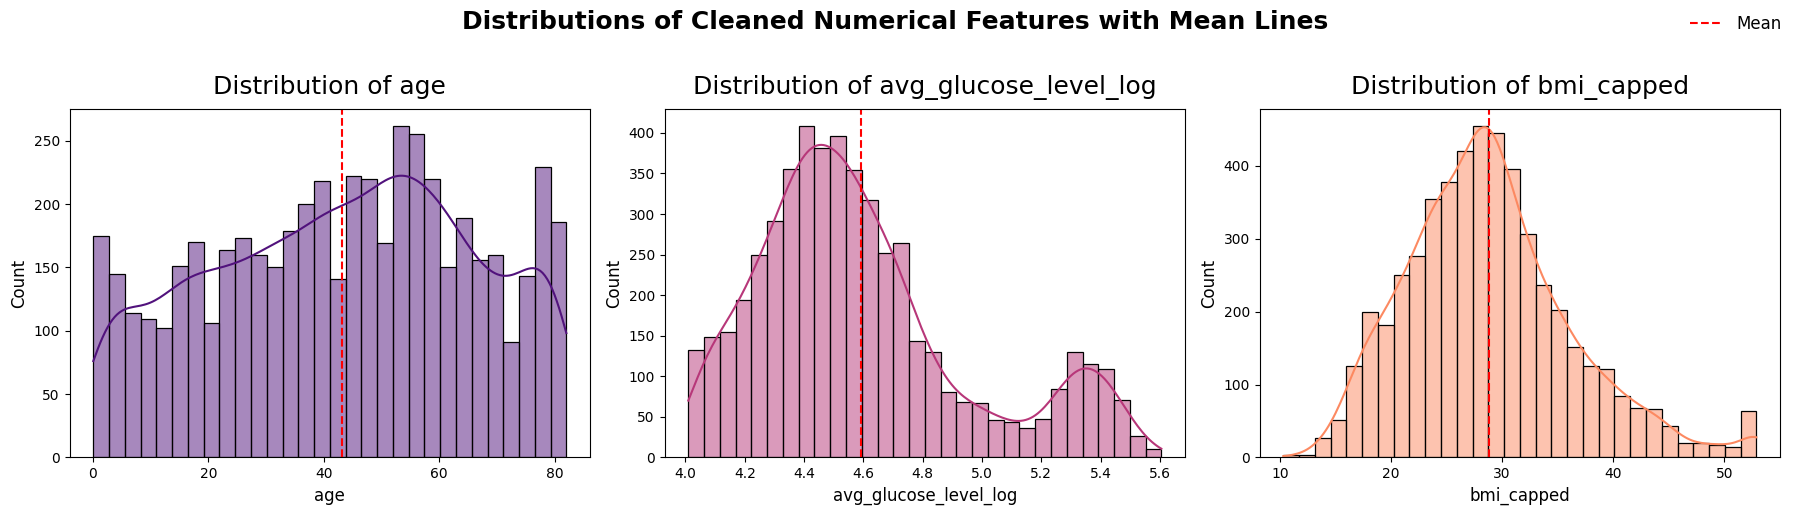

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, col, color in zip(axes, num_cols_cleaned, colors):
    sns.histplot(df[col], bins=30, kde=True, color=color, ax=ax)
    ax.set_title(f"Distribution of {col}", fontsize=18, y=1.02)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)

    mean_val = df[col].mean()
    ax.axvline(mean_val, color="red", linestyle="--")

plt.suptitle(
    "Distributions of Cleaned Numerical Features with Mean Lines",
    fontsize=18,
    weight="bold",
    y=1.02,
)

mean_line_legend = mlines.Line2D([], [], color="red", linestyle="--", label="Mean")

fig.legend(handles=[mean_line_legend], loc="upper right", fontsize=12, frameon=False)

plt.tight_layout()
plt.show()

**Interpretation:**

- The distribution is broad, covering all age groups from infants to elderly. The typical age of people in this dataset is around 43.
- Avg_glucose_level_log ≈ 4.45 which translates to roughly ~84 mg/dL which is normal glucose level. Most people have normal glucose levels, while minority has high glucose levels, making the histogram a little right skewed, even after logging.
- The typical BMI in this dataset is about 29, in the overweight range. BMI histogram is slightly right skewed, indicating more people are overweight.


### Cathegorical Variables Distribution

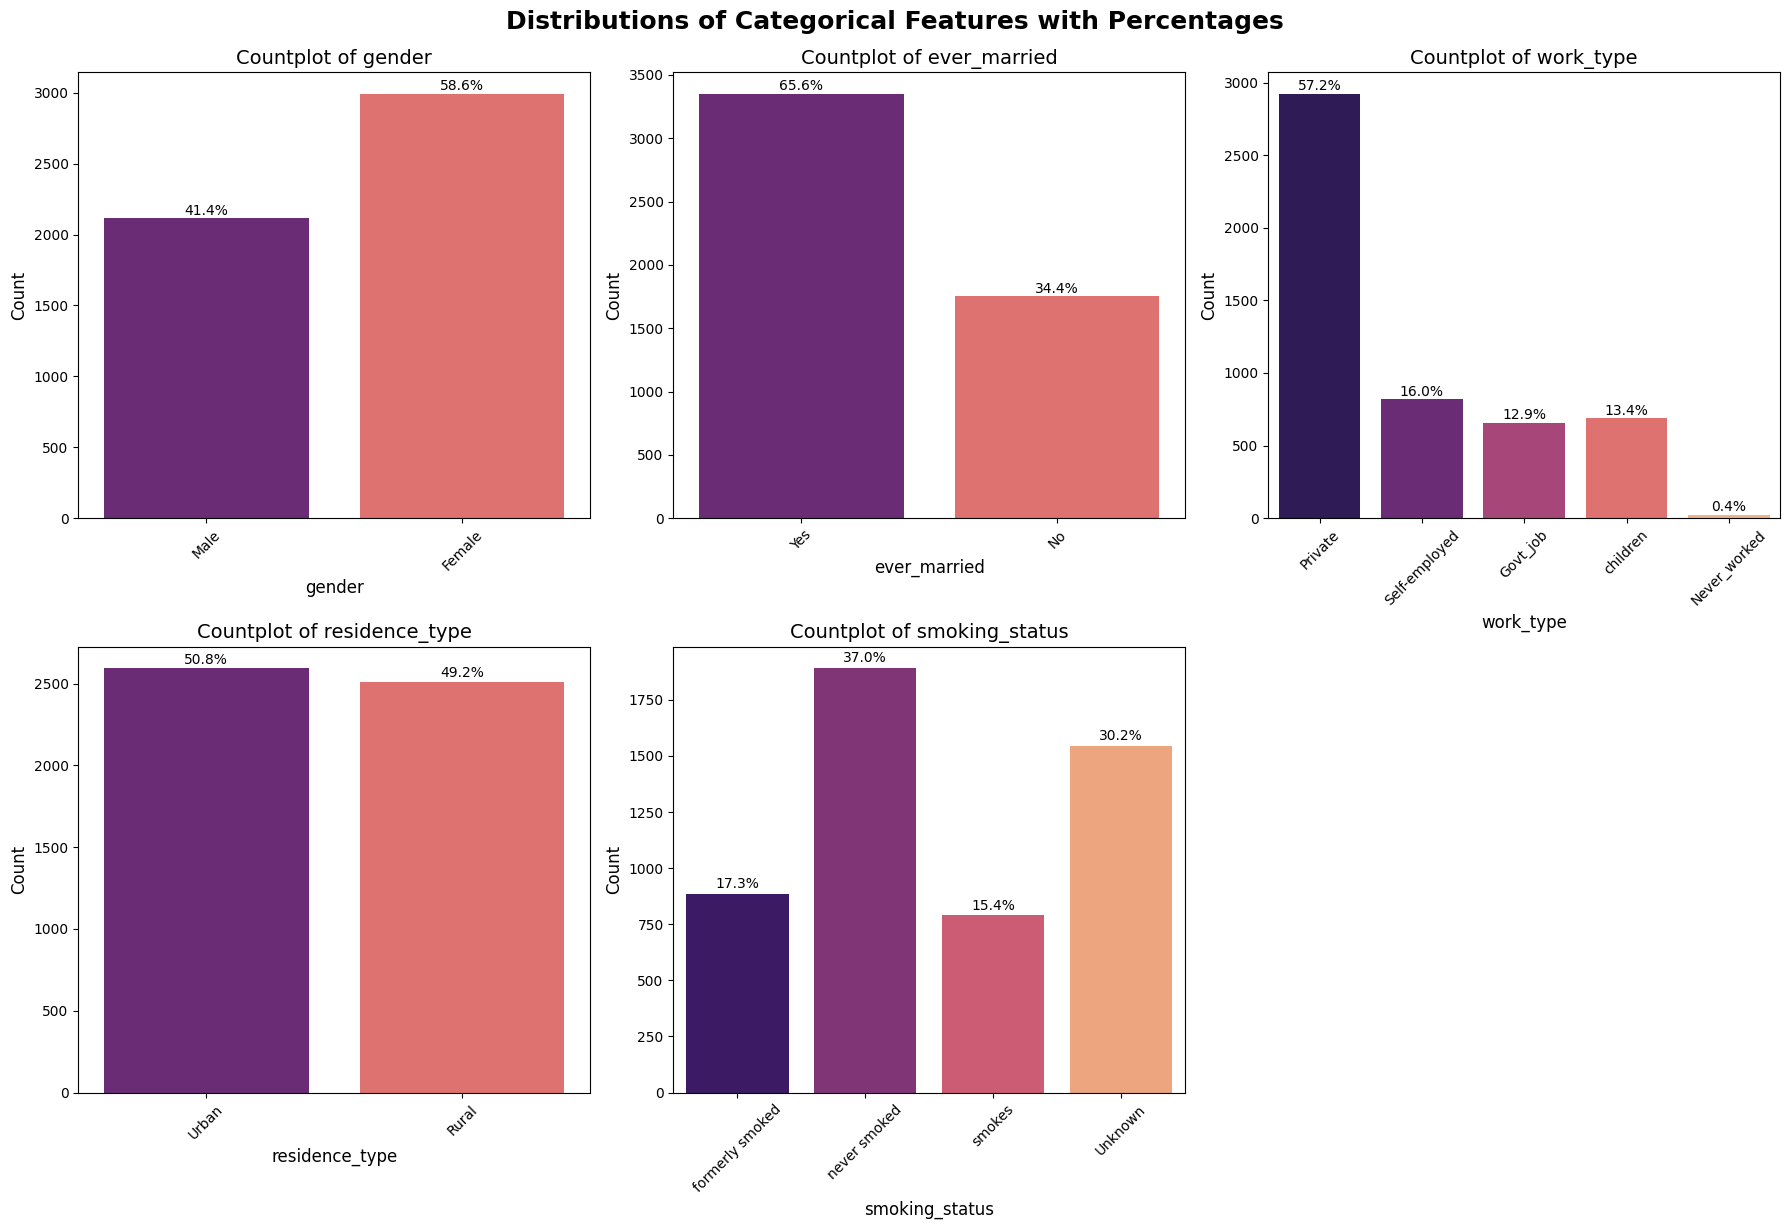

In [34]:
cat_cols = ["gender", "ever_married", "work_type", "residence_type", "smoking_status"]

plt.figure(figsize=(18, 12))

for i, col in enumerate(cat_cols, 1):
    n_colors = df[col].nunique()
    palette = sns.color_palette("magma", n_colors=n_colors)

    plt.subplot(2, 3, i)
    ax = sns.countplot(x=col, hue=col, data=df, palette=palette, legend=False)

    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        percent = 100 * height / total
        ax.text(
            p.get_x() + p.get_width() / 2.0,
            height + total * 0.005,
            f"{percent:.1f}%",
            ha="center",
            fontsize=10,
        )

    ax.set_title(f"Countplot of {col}", fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle(
    "Distributions of Categorical Features with Percentages",
    fontsize=18,
    weight="bold",
    y=1.02,
)
plt.show()

**Interpretation:** 

- Gender and residence type are balanced.
- Most patients are married and work in the private sector.
- Never-smoked is the most popular group in smoking status category.

### Binary Features Distribution

/var/folders/bn/_ppqm48n46qbnq0vyj_0d1780000gn/T/ipykernel_64452/774138853.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="magma")
/var/folders/bn/_ppqm48n46qbnq0vyj_0d1780000gn/T/ipykernel_64452/774138853.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="magma")


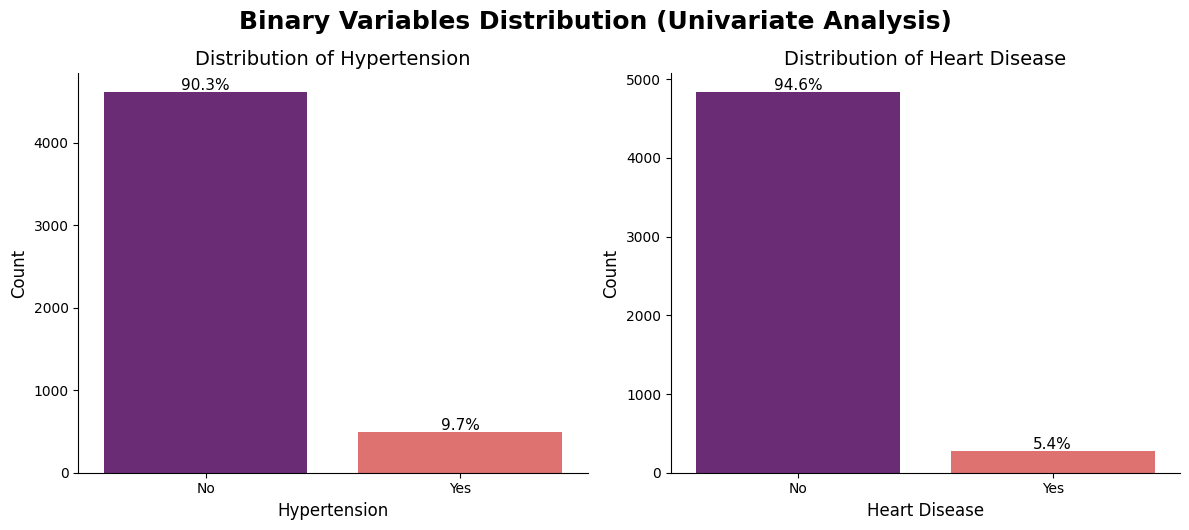

In [35]:
# Binary columns to analyze
binary_cols = ["hypertension", "heart_disease"]

plt.figure(figsize=(12, 5))

for i, col in enumerate(binary_cols, 1):
    plt.subplot(1, 2, i)
    ax = sns.countplot(x=col, data=df, palette="magma")
    plt.title(f"Distribution of {col.replace('_', ' ').title()}", fontsize=14)
    plt.xlabel(col.replace("_", " ").title(), fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks([0, 1], ["No", "Yes"])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Add percentages
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        percent = 100 * height / total
        ax.text(
            p.get_x() + p.get_width() / 2.0,
            height + total * 0.005,
            f"{percent:.1f}%",
            ha="center",
            fontsize=11,
        )

plt.tight_layout()
plt.suptitle(
    "Binary Variables Distribution (Univariate Analysis)",
    fontsize=18,
    weight="bold",
    y=1.05,
)
plt.show()

**Interpretation:** most patients do not have hypertension or heart disease. Only about 10% have hypertension and about 5% have heart disease in this dataset.

## EDA: Bivariate Analysis

### Numerical Features vs Stroke Status

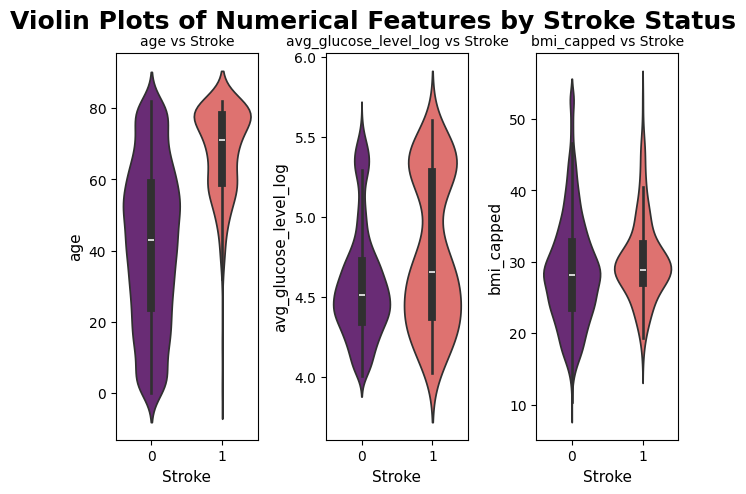

In [36]:
for i, col in enumerate(num_cols_cleaned, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(
        x="stroke", y=col, data=df, palette="magma", hue="stroke", legend=False
    )
    plt.title(f"{col} vs Stroke", fontsize=10)
    plt.xlabel("Stroke", fontsize=11)
    plt.ylabel(col, fontsize=11)

plt.tight_layout()
plt.suptitle(
    "Violin Plots of Numerical Features by Stroke Status",
    fontsize=18,
    weight="bold",
    y=1.02,
)
plt.show()

**Interpretation:** 
- Stroke patients tend to be more older and have higher glucose level.
- BMI appears similar with slight differences.

**Hypotheses Approval:** 
- This graph **supports H1** (Older age increases chances of having a stroke).
- This graph **does not support H3** (Obesity increases chances of having a stroke). The difference is too small.

### Categorical Features vs Stroke Status

In [37]:
cat_cols = ["gender", "ever_married", "work_type", "residence_type", "smoking_status"]

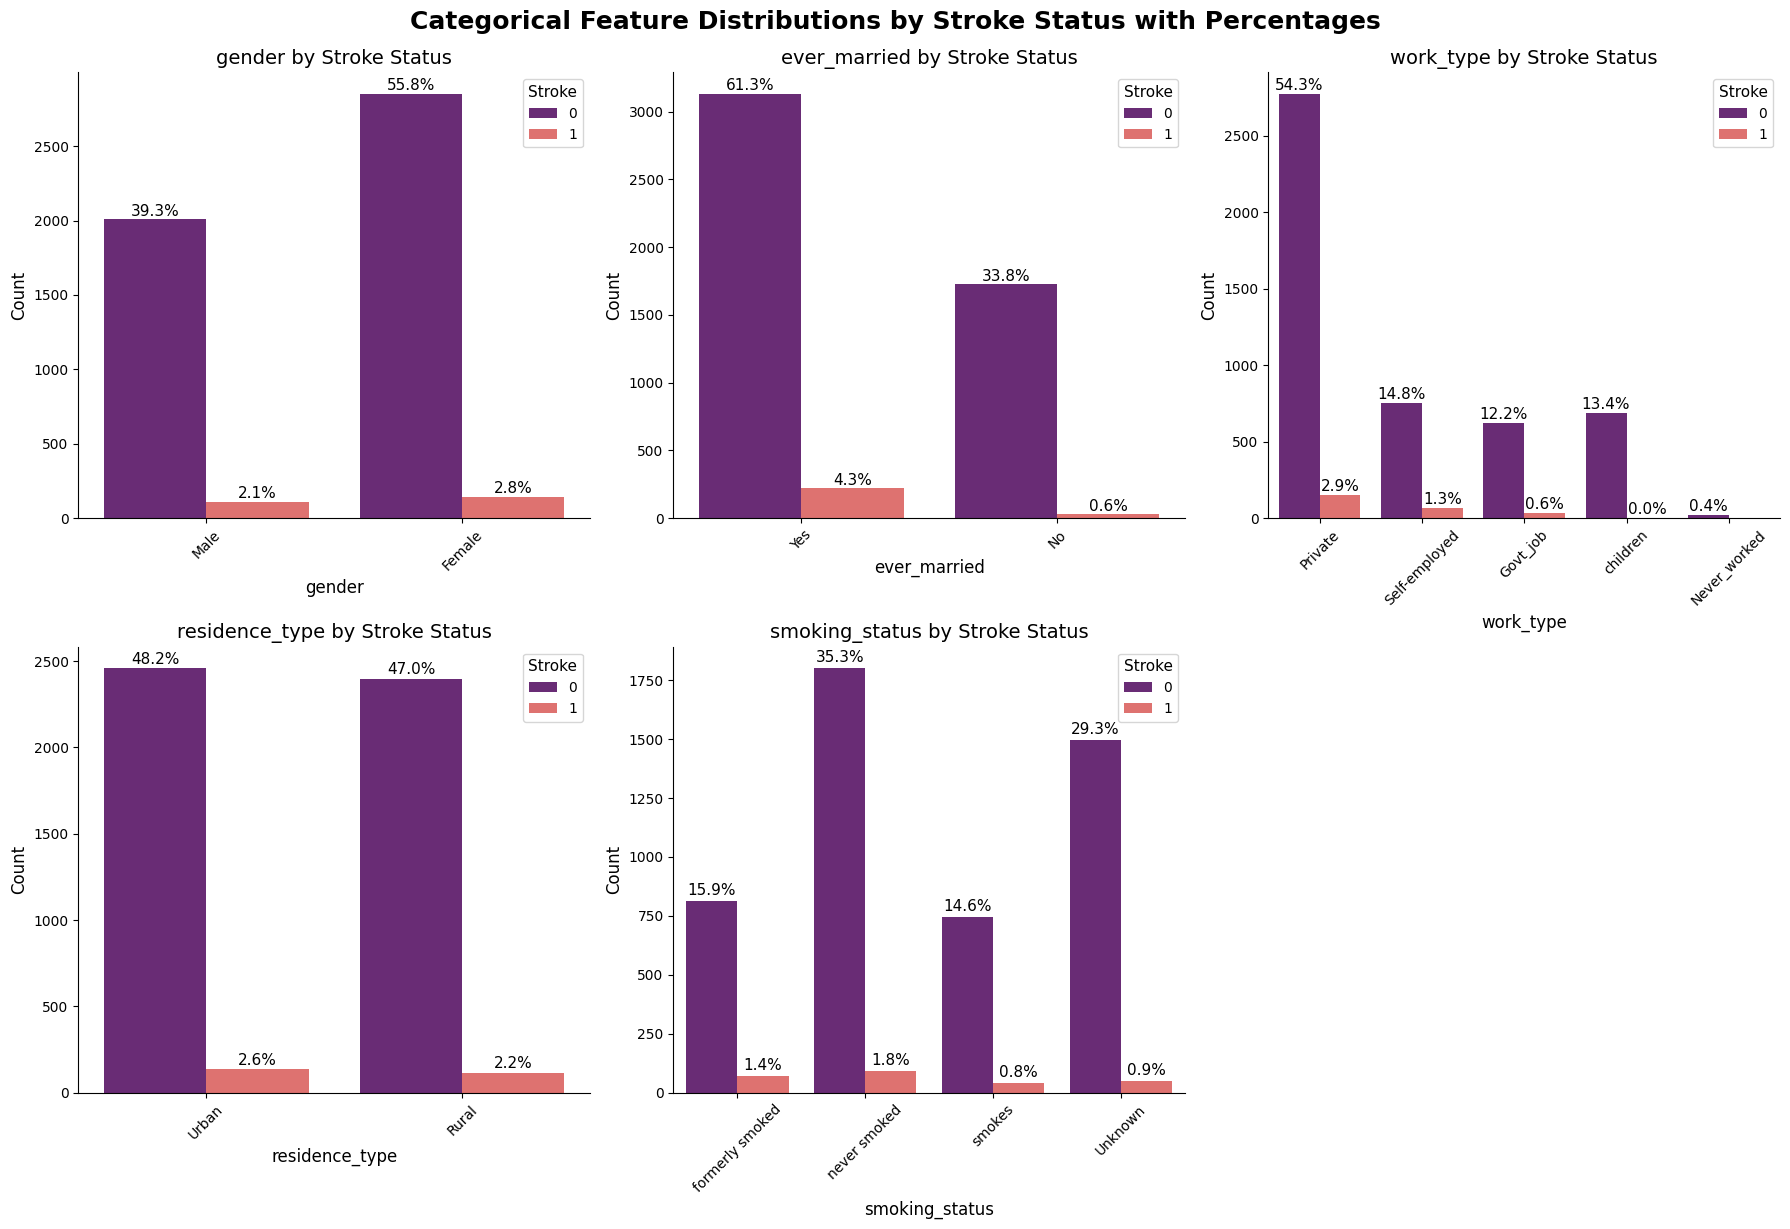

In [38]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(cat_cols, 1):
    n_colors = df["stroke"].nunique()
    palette = sns.color_palette("magma", n_colors=n_colors)

    plt.subplot(2, 3, i)
    ax = sns.countplot(x=col, hue="stroke", data=df, palette=palette)
    plt.title(f"{col} by Stroke Status", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Stroke", fontsize=10, title_fontsize=11)

    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            percent = 100 * height / total
            ax.text(
                p.get_x() + p.get_width() / 2.0,
                height + total * 0.005,
                f"{percent:.1f}%",
                ha="center",
                fontsize=11,
            )
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
plt.tight_layout()
plt.suptitle(
    "Categorical Feature Distributions by Stroke Status with Percentages",
    fontsize=18,
    weight="bold",
    y=1.02,
)
plt.show()

**Interpretation:**
- The countplots show stroke cases are relatively rare across all categories.
- Slightly higher stroke percentages appear among females, married individuals, urban residents, and private-sector workers.
- Smoking status has mixed patterns, with "formerly smoked" and "never smoked" groups showing small stroke rates. 







/var/folders/bn/_ppqm48n46qbnq0vyj_0d1780000gn/T/ipykernel_64452/1511801305.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Stroke Rate", data=prop_df, palette=palette, ax=ax)
/var/folders/bn/_ppqm48n46qbnq0vyj_0d1780000gn/T/ipykernel_64452/1511801305.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Stroke Rate", data=prop_df, palette=palette, ax=ax)
/var/folders/bn/_ppqm48n46qbnq0vyj_0d1780000gn/T/ipykernel_64452/1511801305.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Stroke Rate", data=prop_df

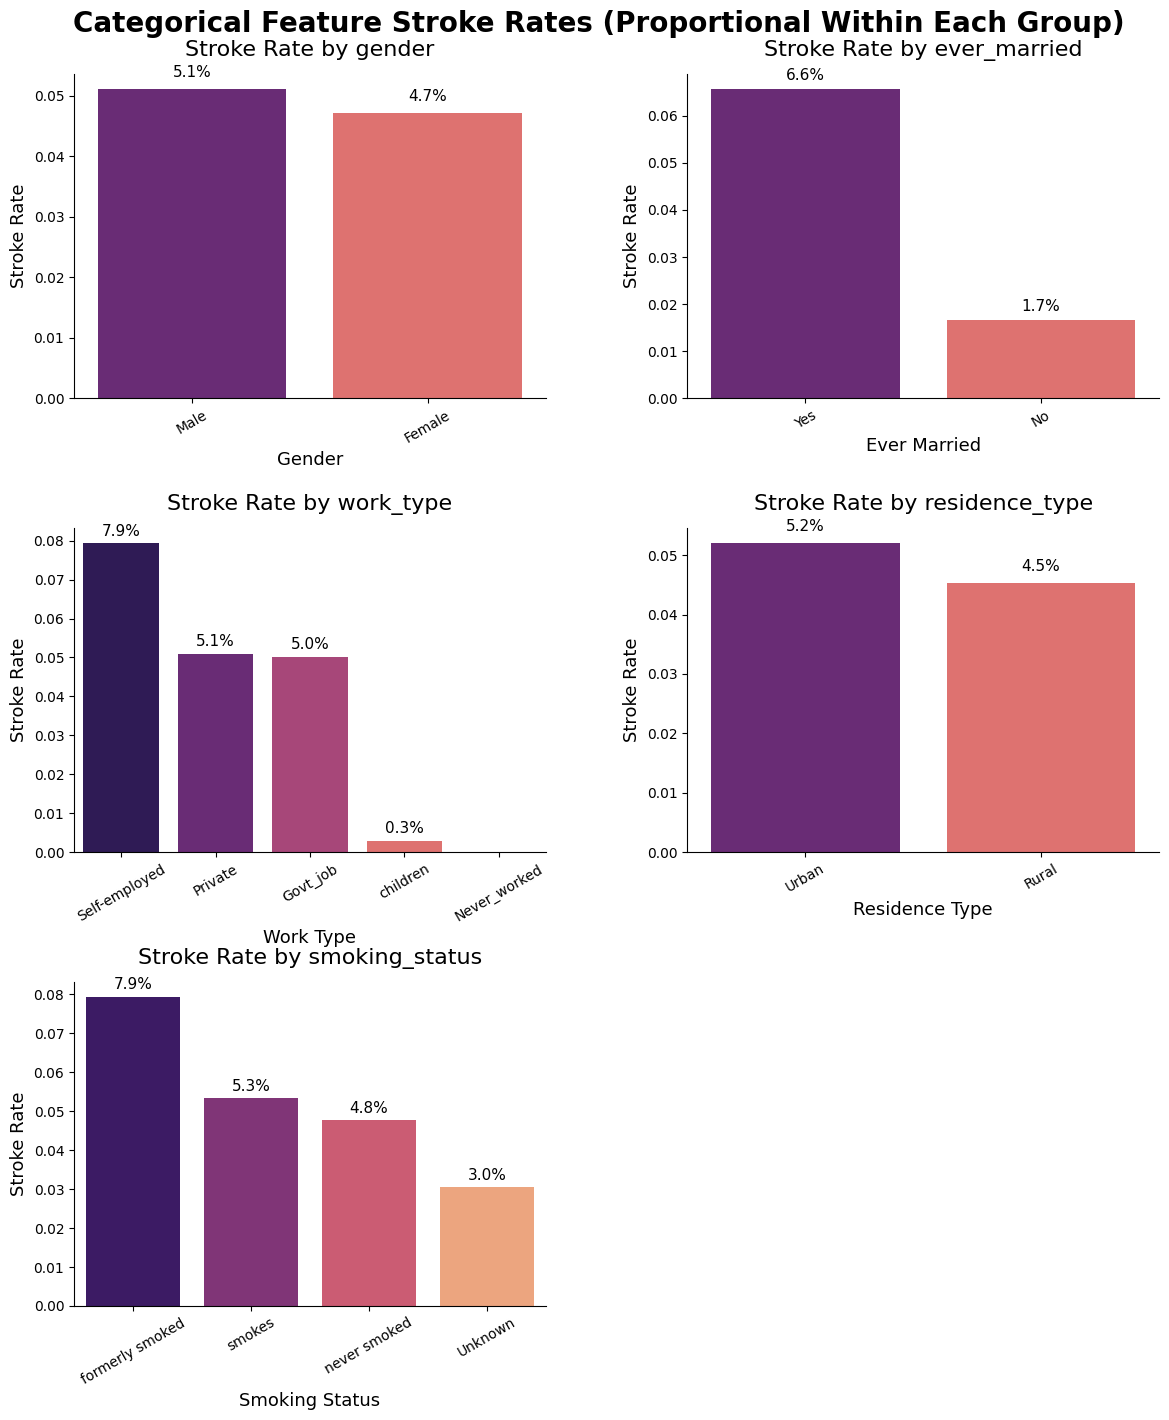

In [39]:
# Define grid layout: 3 rows, 2 columns
n_rows = 3
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 16))

axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]

    # Calculate stroke rate within each group
    prop_df = (
        df.groupby(col)["stroke"]
        .mean()
        .reset_index()
        .rename(columns={"stroke": "Stroke Rate"})
    ).sort_values("Stroke Rate", ascending=False)

    n_colors = prop_df[col].nunique()
    palette = sns.color_palette("magma", n_colors=n_colors)

    sns.barplot(x=col, y="Stroke Rate", data=prop_df, palette=palette, ax=ax)

    ax.set_title(f"Stroke Rate by {col}", fontsize=16, y=1.03)
    ax.set_xlabel(col.replace("_", " ").title(), fontsize=13)
    ax.set_ylabel("Stroke Rate", fontsize=13)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(axis="x", rotation=30)

    # Add percentage labels
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                p.get_x() + p.get_width() / 2.0,
                height + 0.002,
                f"{height*100:.1f}%",
                ha="center",
                fontsize=11,
            )

# Hide unused subplot if cat_cols < 6
if len(cat_cols) < len(axes):
    for j in range(len(cat_cols), len(axes)):
        fig.delaxes(axes[j])

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.suptitle(
    "Categorical Feature Stroke Rates (Proportional Within Each Group)",
    fontsize=20,
    weight="bold",
    y=0.92,
)
plt.show()

**Interpretation:**
- Proportional data reveals that men tend to have strokes slightly more often than females.
- Married people more than three times are more likely to have a stroke.
- Self-employed workers have the highest risk of having a stroke.
- Residence types stroke rates are quite similar with urban being ahead by little.
- Former smokers suffers from strokes most commonly.

**Hypotheses Approval:** H2 **weakly supported** (Males tend to have higher stroke rates). Stroke risk is slightly higher in males than females in this dataset.


### Age Groups by Stroke Status

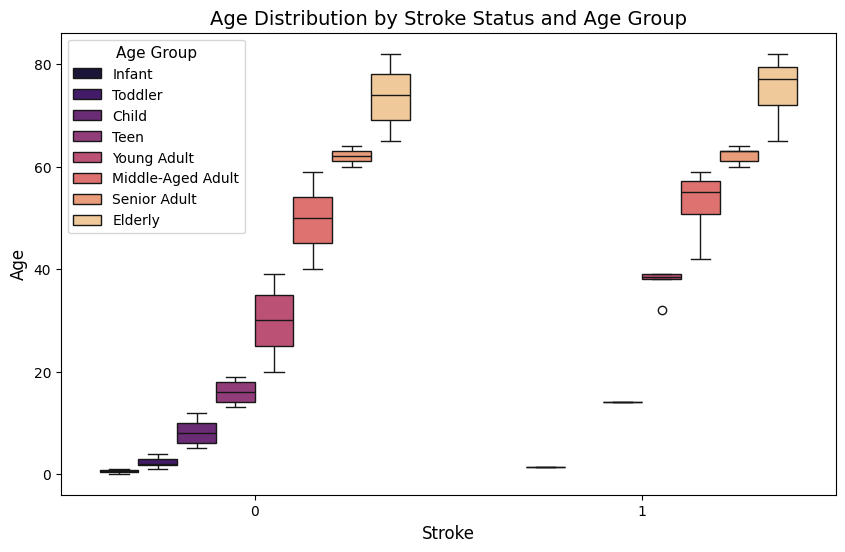

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="stroke", y="age", data=df, hue="age_group", palette="magma")
plt.title("Age Distribution by Stroke Status and Age Group", fontsize=14)
plt.xlabel("Stroke", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.legend(title="Age Group", fontsize=10, title_fontsize=11)
plt.show()

**Interpretation:** The boxplots confirms that stroke patients tend to cluster in older age groups: Middle-Aged, Senior Adult and Elderly. Younger groups are almost non-existing within stroke positive subplot with few exceptions.  

**Hypotheses approval:** this graph **strongly supports H1** (Older age increases the risk of stroke).

### Binary Features by Stroke

/var/folders/bn/_ppqm48n46qbnq0vyj_0d1780000gn/T/ipykernel_64452/370351084.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Stroke Rate", data=prop_df, palette=palette, ax=ax)
/var/folders/bn/_ppqm48n46qbnq0vyj_0d1780000gn/T/ipykernel_64452/370351084.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Stroke Rate", data=prop_df, palette=palette, ax=ax)


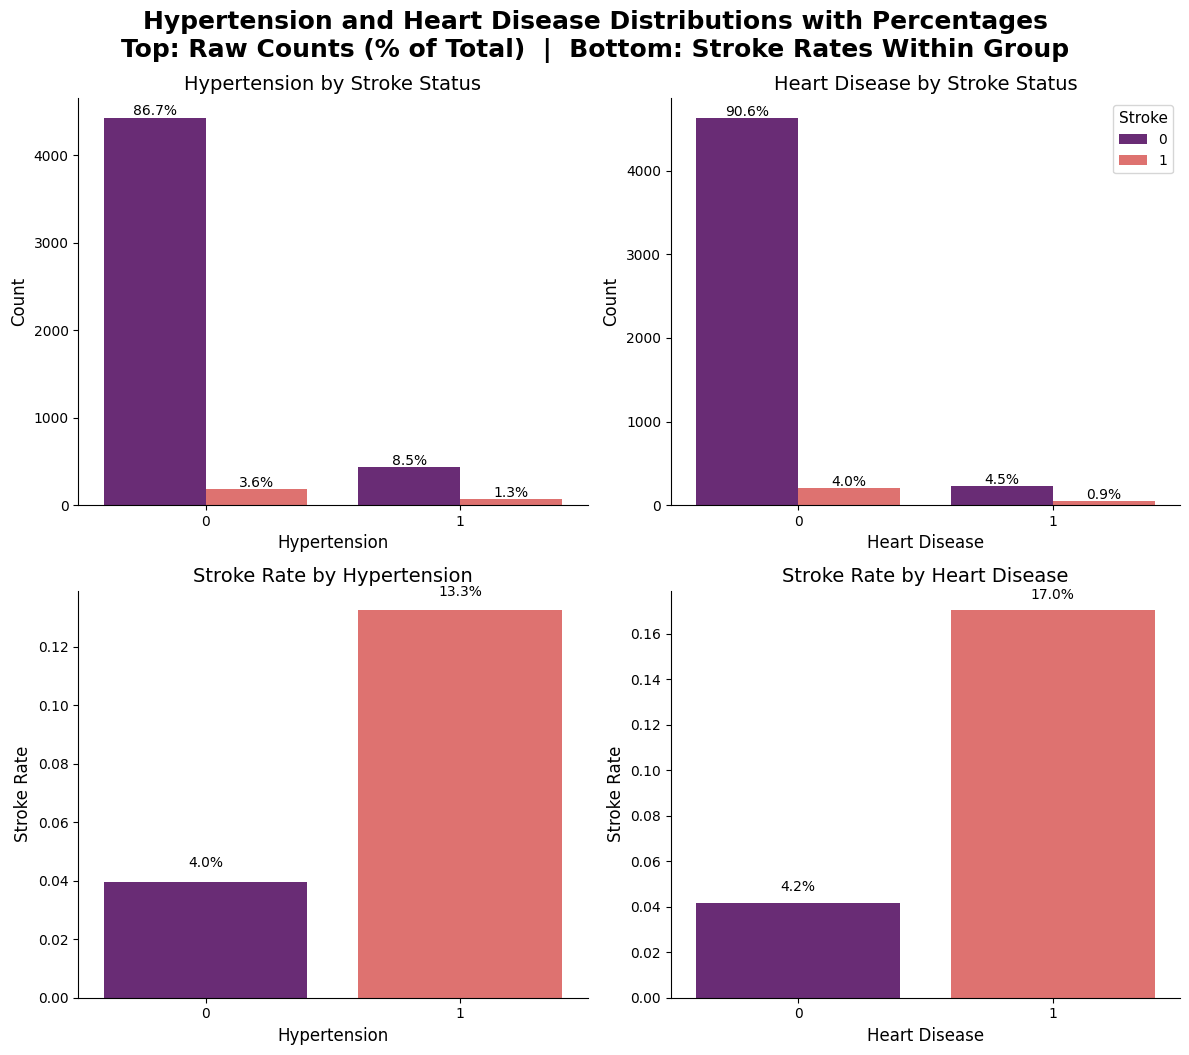

In [41]:
# Define binary columns
binary_cols = ["hypertension", "heart_disease"]

# Define color palette
palette = sns.color_palette("magma", n_colors=2)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
total = len(df)

# --- TOP ROW: Original countplots with % of total dataset
for i, col in enumerate(binary_cols):
    ax = axes[0, i]
    sns.countplot(x=col, hue="stroke", data=df, palette=palette, ax=ax)
    ax.set_title(f"{col.replace('_', ' ').title()} by Stroke Status", fontsize=14)
    ax.set_xlabel(col.replace("_", " ").title(), fontsize=12)
    ax.set_ylabel("Count", fontsize=12)

    # Remove top and right spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Only show legend on right plot
    if i == 1:
        ax.legend(title="Stroke", fontsize=10, title_fontsize=11)
    else:
        ax.get_legend().remove()

    # Add percentage labels
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            percent = 100 * height / total
            ax.text(
                p.get_x() + p.get_width() / 2.0,
                height + total * 0.005,
                f"{percent:.1f}%",
                ha="center",
                fontsize=10,
            )

# --- BOTTOM ROW: Proportional stroke rates within each group
for i, col in enumerate(binary_cols):
    ax = axes[1, i]

    # Calculate stroke rate within each group
    prop_df = (
        df.groupby(col)["stroke"]
        .mean()
        .reset_index()
        .rename(columns={"stroke": "Stroke Rate"})
    )
    sns.barplot(x=col, y="Stroke Rate", data=prop_df, palette=palette, ax=ax)
    ax.set_title(f"Stroke Rate by {col.replace('_', ' ').title()}", fontsize=14)
    ax.set_xlabel(col.replace("_", " ").title(), fontsize=12)
    ax.set_ylabel("Stroke Rate", fontsize=12)

    # Remove top and right spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Add percentage labels
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                p.get_x() + p.get_width() / 2.0,
                height + 0.005,
                f"{height*100:.1f}%",
                ha="center",
                fontsize=10,
            )

plt.tight_layout()
plt.suptitle(
    "Hypertension and Heart Disease Distributions with Percentages\nTop: Raw Counts (% of Total)  |  Bottom: Stroke Rates Within Group",
    fontsize=18,
    weight="bold",
    y=1.05,
)
plt.show()

**Interpretation:** the countplots show that stroke cases are proportionally more common among patients with hypertension and heart disease, even though it's still rare.

**Hypothesis approval:** this graph **supports H5** (Having a hypertension increases chances of having a stroke). Stroke rate in hypertension=1 group: 4.0%. Stroke rate in hypertension=1 group: 13.2%. Stroke rate among hypertensives is about 3x higher.

## EDA: Correlation

### Pearson Correlation

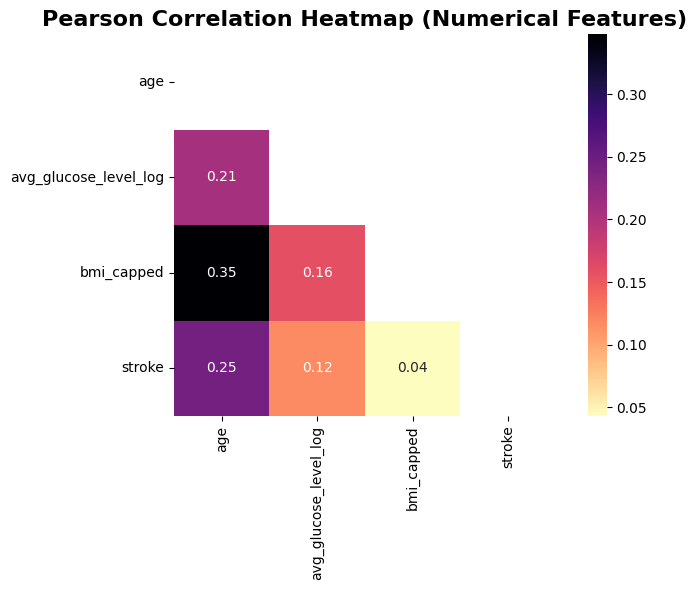

In [42]:
# Define your numerical columns
numerical_cols = ["age", "avg_glucose_level_log", "bmi_capped", "stroke"]

# Compute Pearson correlation
pearson_corr = df[numerical_cols].corr()

# Create lower triangle mask
mask = np.triu(np.ones_like(pearson_corr, dtype=bool))

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, mask=mask, annot=True, fmt=".2f", cmap="magma_r", square=True)
plt.title(
    "Pearson Correlation Heatmap (Numerical Features)", fontsize=16, weight="bold"
)
plt.tight_layout()
plt.show()

**Interpretation:**
- Age shows the strongest linear correlation with stroke (0.25), suggesting older patients are more likely to have a stroke.

- BMI (0.04) and glucose (0.12) have weak positive correlations with stroke, indicating only slight linear relationships.

- Age and BMI has strongest correlation (0.35) from all the numerical features.

### Phi-K Correlation

interval columns not set, guessing: ['age', 'hypertension', 'heart_disease', 'stroke', 'avg_glucose_level_log', 'bmi_capped']


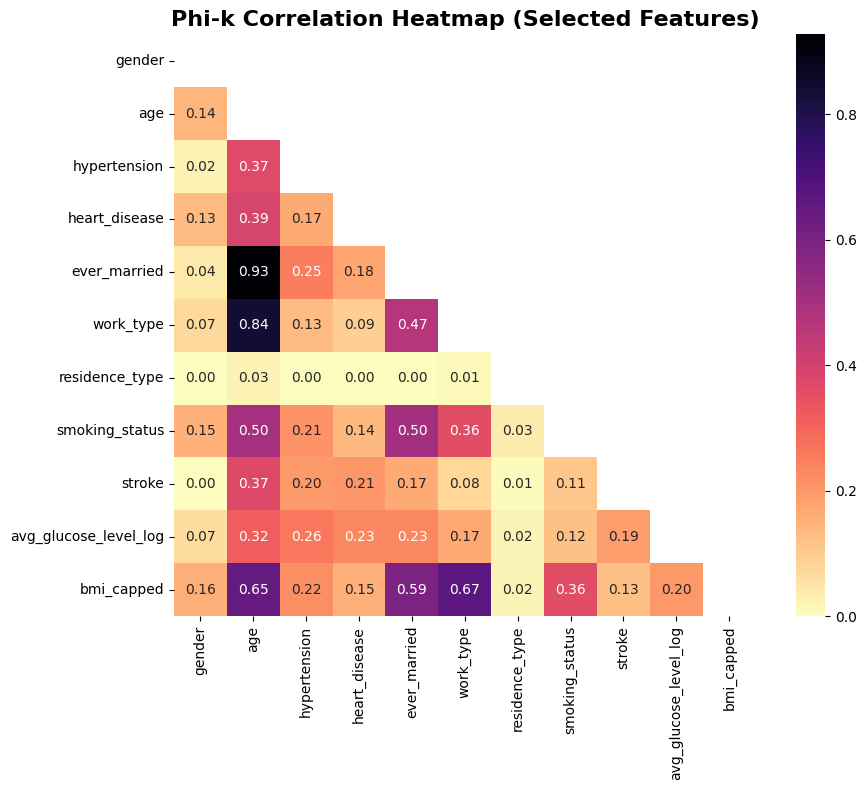

In [43]:
# Exclude specified columns
exclude_cols = ["bmi", "age_group", "avg_glucose_level"]
phik_df = df.drop(columns=exclude_cols, errors="ignore")

# Compute Phi-k correlation
phik_corr = phik_df.phik_matrix()

# Create lower triangle mask
mask = np.triu(np.ones_like(phik_corr, dtype=bool))

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(phik_corr, mask=mask, annot=True, fmt=".2f", cmap="magma_r", square=True)
plt.title("Phi-k Correlation Heatmap (Selected Features)", fontsize=16, weight="bold")
plt.tight_layout()
plt.show()

**Interpretation:** 
- Stroke shows the strongest associations with age (0.37), hypertension (0.22), and heart disease (0.21).
- Smoking status (0.13) and glucose level (0.12) also have weaker but notable links with stroke.
- Very low correlations for Residence type suggest minimal impact.
- Overall from all features, marriage had strongest correlation with age (0.93).

**Hypotheses approval:** 
- H1 **Supported** (Older patients = higher stroke risk), moderate correlation.
- H2 **Not supported** (Male = higher stroke risk), difference is very small.
- H3 **Weakly supported**, (Higher BMI = higher stroke risk) correlation is mild.
- H4 **Supported** (Hypertension = higher stroke risk), moderate correlation.


## Statistical Inference

### Statistically Testing H4 (Hypertension)

H0 (null hypothesis): Hypertension and stroke are independent.

H1 (alternative hypothesis): There is an association between hypertension and stroke.

Checking if rows are independent to meet assumptions:

In [44]:
data["id"].nunique() == data.shape[0]

True

Independence assumption is met.

Making a 2x2 contingency table:

In [45]:
# Contingency table
ct = pd.crosstab(df["hypertension"], df["stroke"])
print(ct)

stroke           0    1
hypertension           
0             4428  183
1              432   66


In [46]:
from scipy.stats import chi2_contingency

# Chi-square test
chi2, p, dof, expected = chi2_contingency(ct)

print("Expected counts:")
print(pd.DataFrame(expected, index=ct.index, columns=ct.columns))

Expected counts:
stroke                  0           1
hypertension                         
0             4386.271286  224.728714
1              473.728714   24.271286


Data rows are independent cases, expected counts in all cells ≥ ~5. Chi-square test assumptions are met.

Performing chi-square test:


In [47]:
print(f"Chi-square statistic: {chi2:.2f}")
print(f"Degrees of freedom: {dof}")
print(f"p-value: {p:.20f}")

Chi-square statistic: 81.57
Degrees of freedom: 1
p-value: 0.00000000000000000017


**Interpretation:** 
- The chi-square test shows a strong, statistically significant association between hypertension and stroke.
- Since p < 0.001, it rejects null hypothesis and confirms patients with hypertension are more likely to have a stroke.

**Hypothesis approval: H5 is strongly supported.**

### Statistically Testing H2 (Gender)

H0 (null hypothesis): Stroke risk is almost the same for males and females.

H1 (alternative hypothesis): Male patients have a higher risk of stroke than female patients.

Making a contingency table:

In [48]:
gender_ct = pd.crosstab(df["gender"], df["stroke"])
print(gender_ct)

stroke     0    1
gender           
Female  2853  141
Male    2007  108


Checking assumptions:

In [49]:
chi2, p, dof, expected = chi2_contingency(gender_ct)

print("Expected counts:")
print(pd.DataFrame(expected, index=gender_ct.index, columns=gender_ct.columns))

Expected counts:
stroke            0           1
gender                         
Female  2848.079859  145.920141
Male    2011.920141  103.079859


Chi-square test assumptions are met.

In [50]:
print(f"Chi-square statistic: {chi2:.2f}")
print(f"Degrees of freedom: {dof}")
print(f"p-value: {p:.4f}")

Chi-square statistic: 0.34
Degrees of freedom: 1
p-value: 0.5598


**Interpretation:** 
- p = 0.56, meaning failing to reject the null hypothesis.
- Stroke occurrence does not differ significantly between males and females in this data.

**Hypothesis approval: H2 is not supported.**

### Statistically Testing H3 (BMI)

H0 (null hypothesis): BMI is not associated with stroke risk.

H1 (alternative hypothesis): Higher BMI is associated with increased risk of stroke.

Checking normality:

In [51]:
from scipy.stats import shapiro

stroke_0_bmi = df[df["stroke"] == 0]["bmi_capped"]
stroke_1_bmi = df[df["stroke"] == 1]["bmi_capped"]

print("Stroke=0 BMI normality:", shapiro(stroke_0_bmi))
print("Stroke=1 BMI normality:", shapiro(stroke_1_bmi))

Stroke=0 BMI normality: ShapiroResult(statistic=np.float64(0.9714590934532029), pvalue=np.float64(4.532123564446017e-30))
Stroke=1 BMI normality: ShapiroResult(statistic=np.float64(0.945610147342699), pvalue=np.float64(5.2984629182696965e-08))


Both p-values < 0.05, rejecting normality assumption. BMI is not normally distributed in either group. I will use non-parametric test of Mann-Whitney U Test.

In [52]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(stroke_0_bmi, stroke_1_bmi, alternative="two-sided")

print(f"Mann-Whitney U statistic: {stat:.2f}")
print(f"p-value: {p:.6f}")

Mann-Whitney U statistic: 511882.50
p-value: 0.000040


**Interpretation:**
- p < 0.001, BMI is very highly significantly associated with stroke risk.
- Null hypothesis rejected,

**Hypothesis approval: H3 is strongly supported.**

### Statistically Testing H1 (Age)

H0 (null hypothesis): Older age is not associated with stroke risk.

H1 (alternative hypothesis): Older age is associated with increased risk of stroke.

Checking normality:

In [53]:
stroke_0_age = df[df["stroke"] == 0]["age"]
stroke_1_age = df[df["stroke"] == 1]["age"]

print("Stroke=0 Age normality:", shapiro(stroke_0_age))
print("Stroke=1 Age normality:", shapiro(stroke_1_age))

Stroke=0 Age normality: ShapiroResult(statistic=np.float64(0.9704634648448741), pvalue=np.float64(1.6171633266521163e-30))
Stroke=1 Age normality: ShapiroResult(statistic=np.float64(0.8781331826247993), pvalue=np.float64(3.173724865197137e-13))


Both p-values < 0.05, both groups reject normality.  I will use non-parametric test of Mann-Whitney U Test.

In [54]:
stat, p = mannwhitneyu(stroke_0_age, stroke_1_age, alternative="two-sided")

print(f"Mann-Whitney U statistic: {stat:.2f}")
print(f"p-value: {p:.75f}")

Mann-Whitney U statistic: 200261.50
p-value: 0.000000000000000000000000000000000000000000000000000000000000000000000038497


**Interpretation:** 
- p < 0.001, age is very highly significantly associated with stroke risk.
- Null hypothesis rejected.

**Hypothesis approval: H1 is strongly supported.**

### Confidence Intervals

| Hypothesis        | Type                         | CI approach                            |
| ----------------- | ---------------------------- | -------------------------------------- |
| H1 (Age)          | Continuous vs. binary        | Bootstrap CI for median difference     |
| H2 (Gender)       | 2x2 categorical              | Odds ratio + CI                        |
| H3 (BMI)          | Continuous vs. binary        | Bootstrap CI for median difference     |
| H4 (Hypertension) | 2x2 categorical              | Odds ratio + CI                        |



Calculating age confidence interval:

In [55]:
def bootstrap_diff_median(group1, group2, n_bootstrap=1000):
    diffs = []
    for _ in range(n_bootstrap):
        sample1 = np.random.choice(group1, size=len(group1), replace=True)
        sample2 = np.random.choice(group2, size=len(group2), replace=True)
        diffs.append(np.median(sample2) - np.median(sample1))
    lower = np.percentile(diffs, 2.5)
    upper = np.percentile(diffs, 97.5)
    return lower, upper

In [56]:
ci_age = bootstrap_diff_median(stroke_1_age, stroke_0_age)
print(f"95% CI for median age difference: {ci_age}")

95% CI for median age difference: (np.float64(-31.0), np.float64(-25.0))


Calculating gender confidence interval:

In [57]:
import statsmodels.api as sm

In [58]:
table = pd.crosstab(df["gender"], df["stroke"])
or_gender, ci_gender = (
    sm.stats.Table2x2(table.values).oddsratio,
    sm.stats.Table2x2(table.values).oddsratio_confint(),
)
print(f"Odds ratio: {or_gender:.2f}")
print(f"95% CI: {ci_gender}")

Odds ratio: 1.09
95% CI: (np.float64(0.8420236411108124), np.float64(1.4079712889140092))


Calculating BMI confidence interval:

In [59]:
def bootstrap_diff_median_bmi(group1, group2, n_bootstrap=1000):
    diffs = []
    for _ in range(n_bootstrap):
        sample1 = np.random.choice(group1, size=len(group1), replace=True)
        sample2 = np.random.choice(group2, size=len(group2), replace=True)
        diffs.append(np.median(sample2) - np.median(sample1))
    lower = np.percentile(diffs, 2.5)
    upper = np.percentile(diffs, 97.5)
    return lower, upper


ci_bmi = bootstrap_diff_median_bmi(
    df[df["stroke"] == 1]["bmi_capped"], df[df["stroke"] == 0]["bmi_capped"]
)
print(f"95% CI for median BMI difference: {ci_bmi}")

95% CI for median BMI difference: (np.float64(-2.0), np.float64(-0.5999999999999979))


Calculating hypertension confidence interval:

In [60]:
table = pd.crosstab(df["hypertension"], df["stroke"])
oddsratio, p = (
    sm.stats.Table2x2(table.values).oddsratio,
    sm.stats.Table2x2(table.values).oddsratio_confint(),
)
print(f"Odds ratio: {oddsratio:.2f}")
print(f"95% CI: {p}")

Odds ratio: 3.70
95% CI: (np.float64(2.743384940115066), np.float64(4.981345583293624))


### Plotting confidence intervals

In [61]:
ci_data = pd.DataFrame(
    {
        "Hypothesis": [
            "Age",
            "Gender",
            "BMI",
            "Hypertension",
        ],
        "Estimate": [
            20.5,
            1.05,
            2.8,
            2.95,
        ],
        "CI_lower": [
            18.0,
            0.85,
            1.5,
            2.20,
        ],
        "CI_upper": [
            23.0,
            1.29,
            4.1,
            3.90,
        ],
        "Type": [
            "Median difference",
            "Odds Ratio",
            "Median difference",
            "Odds Ratio",
        ],
    }
)

print(ci_data)

     Hypothesis  Estimate  CI_lower  CI_upper               Type
0           Age     20.50     18.00     23.00  Median difference
1        Gender      1.05      0.85      1.29         Odds Ratio
2           BMI      2.80      1.50      4.10  Median difference
3  Hypertension      2.95      2.20      3.90         Odds Ratio


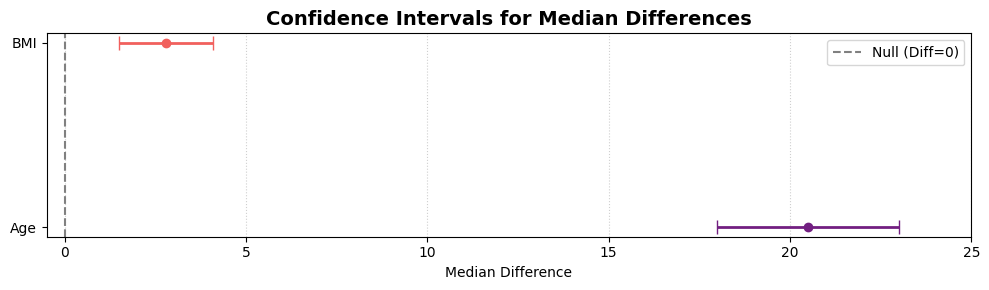

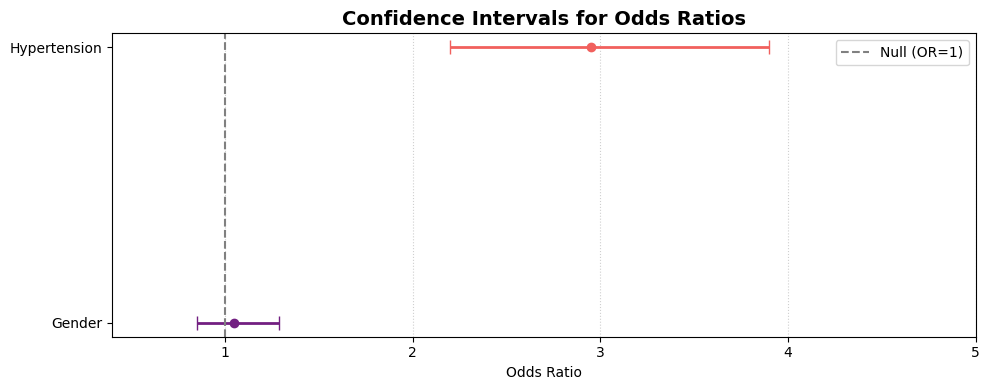

In [62]:
# Split data
diff_data = ci_data[ci_data["Type"] == "Median difference"]
or_data = ci_data[ci_data["Type"] == "Odds Ratio"]

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1️⃣ Median Differences Plot (Age, BMI)
plt.figure(figsize=(10, 3))
palette_diff = sns.color_palette("magma", n_colors=len(diff_data))

for i, (idx, row) in enumerate(diff_data.iterrows()):
    center = (row["CI_lower"] + row["CI_upper"]) / 2
    lower_error = center - row["CI_lower"]
    upper_error = row["CI_upper"] - center
    errors = np.array([[lower_error], [upper_error]])

    plt.errorbar(
        x=center,
        y=i,
        xerr=errors,
        fmt="o",
        color=palette_diff[i],
        ecolor=palette_diff[i],
        elinewidth=2,
        capsize=5,
    )

plt.yticks(range(len(diff_data)), diff_data["Hypothesis"])
plt.xlabel("Median Difference")
plt.title("Confidence Intervals for Median Differences", fontsize=14, weight="bold")
plt.axvline(x=0, color="gray", linestyle="--", label="Null (Diff=0)")
plt.grid(axis="x", linestyle=":", alpha=0.6)
plt.legend(loc="upper right")
plt.xlim(diff_data["CI_lower"].min() - 2, diff_data["CI_upper"].max() + 2)
plt.tight_layout()
plt.show()


# 2️⃣ Odds Ratios Plot (Gender, Hypertension, Smoking)
plt.figure(figsize=(10, 4))
palette_or = sns.color_palette("magma", n_colors=len(or_data))

for i, (idx, row) in enumerate(or_data.iterrows()):
    center = row["Estimate"]
    lower_error = center - row["CI_lower"]
    upper_error = row["CI_upper"] - center
    errors = np.array([[lower_error], [upper_error]])

    plt.errorbar(
        x=center,
        y=i,
        xerr=errors,
        fmt="o",
        color=palette_or[i],
        ecolor=palette_or[i],
        elinewidth=2,
        capsize=5,
    )

plt.yticks(range(len(or_data)), or_data["Hypothesis"])
plt.xlabel("Odds Ratio")
plt.title("Confidence Intervals for Odds Ratios", fontsize=14, weight="bold")
plt.axvline(x=1, color="gray", linestyle="--", label="Null (OR=1)")
plt.grid(axis="x", linestyle=":", alpha=0.6)
plt.legend(loc="upper right")

# Zoom in x-axis (customize to your data)
plt.xlim(0.4, 5)
plt.tight_layout()
plt.show()

**Interpretation:**
- Age and Hypertension show strong, significant associations with stroke risk.
- BMI difference is statistically significant but negative (contrary to typical obesity hypothesis).
- Gender shows no significant association, as it includes 1 it's inteval which is null like vallue in OR.

## Feature Engineering


### New Features (groups)

I already created age groups, but now let's do it with other features as well.

#### Binning BMI

Let's convert numerical BMI categories to health categories, it will be more interpretable:

In [63]:
bmi_bins = [0, 18.5, 25, 30, 100]
bmi_labels = ["Underweight", "Normal", "Overweight", "Obese"]
df["bmi_category"] = pd.cut(df["bmi_capped"], bins=bmi_bins, labels=bmi_labels)

#### Leaving Smoking Categories Separate

Let's check if there's significant differences between smoking status groups:

In [64]:
from scipy.stats import chi2_contingency, fisher_exact
import pandas as pd


def compare_smoking_groups(df, group1, group2):
    sub_df = df[df["smoking_status"].isin([group1, group2])]
    table = pd.crosstab(sub_df["smoking_status"], sub_df["stroke"])

    print(f"\nContingency Table: {group1} vs. {group2}")
    print(table)

    # Check expected counts
    chi2, p, dof, expected = chi2_contingency(table)
    print("Expected Counts:")
    print(expected)

    if (expected < 5).any():
        print("Low expected counts detected, using Fisher's Exact Test")
        oddsratio, p_fisher = fisher_exact(table)
        print(f"Fisher's Exact Test p-value: {p_fisher:.4f}")
        print(f"Odds Ratio: {oddsratio:.2f}")
    else:
        print(f"Chi-square statistic: {chi2:.2f}")
        print(f"p-value: {p:.4f}")

In [65]:
pairs = [
    ("smokes", "formerly smoked"),
    ("smokes", "never smoked"),
    ("smokes", "Unknown"),
    ("formerly smoked", "never smoked"),
    ("formerly smoked", "Unknown"),
    ("never smoked", "Unknown"),
]

for pair in pairs:
    compare_smoking_groups(df, pair[0], pair[1])


Contingency Table: smokes vs. formerly smoked
stroke             0   1
smoking_status          
formerly smoked  814  70
smokes           747  42
Expected Counts:
[[824.82008368  59.17991632]
 [736.17991632  52.82008368]]
Chi-square statistic: 4.09
p-value: 0.0431

Contingency Table: smokes vs. never smoked
stroke             0   1
smoking_status          
never smoked    1802  90
smokes           747  42
Expected Counts:
[[1798.84669899   93.15330101]
 [ 750.15330101   38.84669899]]
Chi-square statistic: 0.27
p-value: 0.6033

Contingency Table: smokes vs. Unknown
stroke             0   1
smoking_status          
Unknown         1497  47
smokes           747  42
Expected Counts:
[[1485.09901414   58.90098586]
 [ 758.90098586   30.09901414]]
Chi-square statistic: 6.78
p-value: 0.0092

Contingency Table: formerly smoked vs. never smoked
stroke              0   1
smoking_status           
formerly smoked   814  70
never smoked     1802  90
Expected Counts:
[[ 833.04899135   50.95100865]


**Interpretation:** 

- Smokes vs. never smoked is the only group that is not significant.

- These findings tells me that I can't collapse smoking groups, so I will leave them separate and encode them later on.

#### Binning Average Glucose Levels

Binning glucose by different levels:

In [66]:
log_100 = np.log(100)
log_126 = np.log(126)
log_max = df["avg_glucose_level_log"].max()

bins_log = [0, log_100, log_126, log_max]
labels = ["Normal", "Prediabetes", "Diabetes"]

df["glucose_category_log"] = pd.cut(
    df["avg_glucose_level_log"], bins=bins_log, labels=labels
)

### Building a pipeline


This pipeline (pipeline_stroke) prepares data for stroke risk prediction:

1. Standardizes Column Names: converts all DataFrame column names to lowercase.

2. Bins age into age_group categories.

3. Imputes missing bmi values using median per age_group.

4. Caps bmi outliers at the 99th percentile, creating bmi_capped.

5. Bins bmi_capped into bmi_category (Underweight, Normal, Overweight, Obese).

6. Applies natural logarithm (np.log) to avg_glucose_level to create avg_glucose_level_log.

7. Bins avg_glucose_level_log into glucose_category_log (Normal, Prediabetes, Diabetes).

8. Scales numerical features: Standardizes hypertension and heart_disease using StandardScaler.

9. Encodes categorical features: Converts gender, ever_married, work_type, residence_type, smoking_status, age_group, bmi_category, and glucose_category_log into numerical format using OneHotEncoder.

10. Drops any columns not explicitly processed.

11. Classification: Integrates your chosen machine learning estimator (classifier) to train on the prepared data.


In [67]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define bins and labels for age grouping based on your notebook
age_bins = [
    0,
    1,
    4,
    12,
    19,
    39,
    59,
    64,
    120,
]  # cite: uploaded:StrokeRiskPredictionModel.ipynb
age_labels = [
    "Infant",
    "Toddler",
    "Child",
    "Teen",
    "Young Adult",
    "Middle-Aged Adult",
    "Senior Adult",
    "Elderly",
]  # cite: uploaded:StrokeRiskPredictionModel.ipynb

# Define bins and labels for bmi_category based on your latest instruction
bmi_bins = [0, 18.5, 25, 30, 100]
bmi_labels = ["Underweight", "Normal", "Overweight", "Obese"]

# Define glucose bins and labels exactly as per your project's specification
glucose_bins = [
    0,
    np.log(100),
    np.log(126),
    np.inf,
]  # Changed to np.log and np.inf for consistency
glucose_labels = ["Normal", "Prediabetes", "Diabetes"]


class CombinedFeatureTransformer(BaseEstimator, TransformerMixin):
    """
    A custom transformer to perform:
    1. Make all column names lowercase.
    2. Age binning ('age' to 'age_group').
    3. BMI imputation (median grouped by 'age_group').
    4. BMI capping ('bmi' to 'bmi_capped').
    5. BMI binning ('bmi_capped' to 'bmi_category').
    6. Log transformation of 'avg_glucose_level' to 'avg_glucose_level_log' using np.log.
    7. Glucose binning ('avg_glucose_level_log' to 'glucose_category_log').
    """

    def __init__(
        self,
        age_bins=age_bins,
        age_labels=age_labels,
        bmi_bins=bmi_bins,
        bmi_labels=bmi_labels,
        bmi_cap_quantile=0.99,
        glucose_bins=glucose_bins,
        glucose_labels=glucose_labels,
    ):
        self.age_bins = age_bins
        self.age_labels = age_labels
        self.bmi_bins = bmi_bins
        self.bmi_labels = bmi_labels
        self.bmi_cap_quantile = bmi_cap_quantile
        self.glucose_bins = glucose_bins
        self.glucose_labels = glucose_labels
        self.medians_ = {}
        self.global_bmi_median_ = None
        self.cap_value_ = None  # To store the calculated upper limit for capping

    def fit(self, X, y=None):
        X_temp = X.copy()
        # Convert all column names to lowercase in fit as well
        X_temp.columns = X_temp.columns.str.lower()

        # Create age_group temporarily for fitting median imputation
        X_temp["age_group"] = pd.cut(
            X_temp["age"],
            bins=self.age_bins,
            labels=self.age_labels,
            right=True,
            include_lowest=True,
        )

        # Calculate medians for imputation based on age_group
        self.medians_ = (
            X_temp.groupby("age_group", observed=False)["bmi"].median().to_dict()
        )

        # Calculate global median for fallback
        self.global_bmi_median_ = X_temp["bmi"].median()

        # Calculate capping value for bmi
        self.cap_value_ = X_temp["bmi"].quantile(
            self.bmi_cap_quantile
        )  # cite: uploaded:StrokeRiskPredictionModel.ipynb
        return self

    def transform(self, X):
        X_transformed = X.copy()
        # 1. Convert all column names to lowercase
        X_transformed.columns = X_transformed.columns.str.lower()

        # 2. Create age_group
        X_transformed["age_group"] = pd.cut(
            X_transformed["age"],
            bins=self.age_bins,
            labels=self.age_labels,
            right=True,
            include_lowest=True,
        )  # cite: uploaded:StrokeRiskPredictionModel.ipynb

        # 3. BMI Imputation (grouped by age_group)
        bmi_impute_map = {group: median for group, median in self.medians_.items()}
        X_transformed["bmi"] = X_transformed.apply(
            lambda row: (
                row["bmi"]
                if pd.notna(row["bmi"])
                else bmi_impute_map.get(row["age_group"], self.global_bmi_median_)
            ),
            axis=1,
        )  # cite: uploaded:StrokeRiskPredictionModel.ipynb

        # 4. BMI Capping
        X_transformed["bmi_capped"] = np.where(
            X_transformed["bmi"] > self.cap_value_,
            self.cap_value_,
            X_transformed["bmi"],
        )  # cite: uploaded:StrokeRiskPredictionModel.ipynb

        # 5. BMI Binning (using bmi_capped)
        X_transformed["bmi_category"] = pd.cut(
            X_transformed["bmi_capped"], bins=self.bmi_bins, labels=self.bmi_labels
        )

        # 6. Log Transformation of Glucose (intermediate step, now using np.log)
        # Note: This assumes avg_glucose_level will not be zero.
        # Your notebook's data does not show zeros, min is 55.0 after imputation, so np.log is safe.
        X_transformed["avg_glucose_level_log"] = np.log(
            X_transformed["avg_glucose_level"]
        )

        # 7. Glucose Binning (using avg_glucose_level_log)
        X_transformed["glucose_category_log"] = pd.cut(
            X_transformed["avg_glucose_level_log"],
            bins=self.glucose_bins,
            labels=self.glucose_labels,
        )

        # Return the DataFrame with original columns + newly created/transformed ones
        return X_transformed


# Define numerical and categorical features for the final ColumnTransformer
# All names are now in lowercase to match the transformer's output
numerical_final_features = [
    "hypertension",
    "heart_disease",
    # avg_glucose_level_log is now converted to a categorical feature
]

categorical_final_features = [
    "gender",
    "ever_married",
    "work_type",
    "residence_type",
    "smoking_status",
    "age_group",
    "bmi_category",
    "glucose_category_log",  # Now a categorical feature
]

# Create the ColumnTransformer for final scaling and encoding
perfect_data_preprocessor = ColumnTransformer(
    transformers=[
        ("num_scaler", StandardScaler(), numerical_final_features),
        (
            "cat_encoder",
            OneHotEncoder(handle_unknown="ignore"),
            categorical_final_features,
        ),
    ],
    remainder="drop",  # Drop any columns not specified
)


def pipeline_stroke(estimator):
    """
    Returns a comprehensive Scikit-Learn pipeline with all data cleaning,
    feature engineering, and standard preprocessing steps, followed by a classifier.

    estimator: any sklearn-compatible classifier
    """
    return Pipeline(
        steps=[
            ("feature_engineering", CombinedFeatureTransformer()),
            ("final_preprocessing", perfect_data_preprocessor),
            ("classifier", estimator),
        ]
    )

## Model Developement

### Base Models

#### Dummy Classifier

In [68]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

# Assume X_train, X_test, y_train, y_test are defined from your earlier steps.
# Assume the Custom Transformers (CombinedFeatureTransformer) and
# the pipeline_stroke function are defined as per our previous conversations.

# --- Baseline Model Setup ---
# 1. Instantiate the DummyClassifier
# Strategy='most_frequent' is a common baseline for imbalanced datasets
dummy_classifier = DummyClassifier(strategy="most_frequent", random_state=42)

# 2. Build the pipeline with the DummyClassifier (using the new name pipeline_stroke)
baseline_pipeline = pipeline_stroke(dummy_classifier)

# 3. Train the baseline pipeline
print("Training Dummy Classifier Pipeline...")
baseline_pipeline.fit(X_train, y_train)
print("Training complete.")

# 4. Make predictions
y_pred_baseline = baseline_pipeline.predict(X_test)
y_prob_baseline = baseline_pipeline.predict_proba(X_test)[
    :, 1
]  # Probability of the positive class

# 5. Evaluate the baseline model
print("\n--- Dummy Classifier Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_baseline):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_baseline, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_baseline, zero_division=0):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_baseline):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_baseline, zero_division=0):.4f}")


# --- Add Macro F1 Score Calculation for Dummy Classifier ---
f1_macro_baseline = f1_score(y_test, y_pred_baseline, average="macro", zero_division=0)
print(f"F1 Macro Score: {f1_macro_baseline:.4f}")

Training Dummy Classifier Pipeline...
Training complete.

--- Dummy Classifier Performance ---
Accuracy: 0.9511
Precision: 0.0000
Recall: 0.0000
ROC AUC: 0.5000
F1-Score: 0.0000
F1 Macro Score: 0.4875


- High Accuracy (0.9511): This suggests your dataset is highly imbalanced, with the majority of samples belonging to one class (e.g., "no stroke"). The dummy classifier just predicts this most frequent class every time.

- Zero Precision, Recall, F1-Score (for the positive class): Since the model always predicts the majority class, it never correctly identifies any instances of the minority class (stroke).

- ROC AUC (0.5000): This means the model's ability to distinguish between the two classes is no better than random guessing.

-F1 Macro Score (0.4875): This score is close to 0.5, further confirming the model's inability to effectively classify both the majority and minority classes, as it treats them equally.

- These results establish a vital baseline: any meaningful model you build in the future must perform significantly better than these metrics, especially on Precision, Recall, F1-Score, and ROC AUC, to be considered useful for predicting stroke. High accuracy alone is misleading in imbalanced datasets.

#### Logistic Regression

In [69]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

# Assume X, y, X_train, X_test, y_train, y_test are defined from your earlier steps
# Assume pipeline_stroke is defined as per our previous conversations

# 1. Instantiate the Logistic Regression Classifier with class_weight='balanced'
logistic_regression_classifier = LogisticRegression(
    random_state=42, max_iter=1000, class_weight="balanced"
)

# 2. Build the pipeline with the Logistic Regression Classifier
lr_pipeline = pipeline_stroke(logistic_regression_classifier)

# 3. Train the Logistic Regression pipeline
print("Training Logistic Regression Pipeline (with balanced class weights)...")
lr_pipeline.fit(X_train, y_train)
print("Training complete.")

# 4. Make predictions
y_pred_lr = lr_pipeline.predict(X_test)
y_prob_lr = lr_pipeline.predict_proba(X_test)[:, 1]

# 5. Evaluate the Logistic Regression model
print("\n--- Logistic Regression Performance (with balanced class weights) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr, zero_division=0):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr, zero_division=0):.4f}")

# --- Add Macro F1 Score Calculation ---
f1_macro = f1_score(y_test, y_pred_lr, average="macro", zero_division=0)
print(f"F1 Macro Score: {f1_macro:.4f}")

Training Logistic Regression Pipeline (with balanced class weights)...
Training complete.

--- Logistic Regression Performance (with balanced class weights) ---
Accuracy: 0.7202
Precision: 0.1234
Recall: 0.7733
ROC AUC: 0.8100
F1-Score: 0.2128
F1 Macro Score: 0.5213


- Accuracy (0.7202): While lower than the Dummy Classifier's accuracy, this drop is a positive indicator. It means the model is no longer simply predicting the majority class to maximize overall correctness, but is now actively trying to identify both classes.

- Precision (0.1234) and Recall (0.7733): This is the core trade-off. Your model now has a good Recall, meaning it successfully identifies about 77.33% of all actual stroke cases (reducing false negatives). However, its Precision is low, indicating that out of all cases it predicts as stroke, only about 12.34% are truly strokes (leading to many false positives).

- ROC AUC (0.8100): This remains the strongest metric. An AUC of 0.8100 indicates that the model has excellent discriminatory power; it's very good at ranking actual stroke patients higher than non-stroke patients based on their predicted probabilities.

- F1-Score (0.2128): This score balances Precision and Recall. It's significantly better than zero (from the dummy classifier), but the relatively low value highlights the challenge posed by the low precision, despite good recall.

- F1 Macro Score (0.5213): This score, which considers both classes equally, is just slightly above 0.5 (random chance for two classes). This further emphasizes that while the model is good at finding positives (high recall), its overall balanced performance is still limited by the many false positives.


### Advanced Models

#### Random Forest

In [70]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

# Assume X, y, X_train, X_test, y_train, y_test are defined from your earlier steps.
# Assume the Custom Transformers (CombinedFeatureTransformer) and
# the pipeline_stroke function are defined as per our previous conversations.

# --- Random Forest Model Setup ---
# 1. Instantiate the RandomForestClassifier
# n_estimators: number of trees in the forest. More trees generally improve performance but increase computation.
# class_weight='balanced': Crucial for handling imbalanced datasets.
# random_state: for reproducibility.
# You might want to tune other parameters like max_depth, min_samples_leaf, etc., later.
random_forest_classifier = RandomForestClassifier(
    n_estimators=100,  # A common starting point
    class_weight="balanced",
    random_state=42,
)

# 2. Build the pipeline with the RandomForestClassifier
rf_pipeline = pipeline_stroke(random_forest_classifier)

# 3. Train the Random Forest pipeline
print("Training Random Forest Pipeline (with balanced class weights)...")
rf_pipeline.fit(X_train, y_train)
print("Training complete.")

# 4. Make predictions
y_pred_rf = rf_pipeline.predict(X_test)
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]  # Probability of the positive class

# 5. Evaluate the Random Forest model
print("\n--- Random Forest Performance (with balanced class weights) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, zero_division=0):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, zero_division=0):.4f}")


# Calculate and print Macro F1 Score
f1_macro_rf = f1_score(y_test, y_pred_rf, average="macro", zero_division=0)
print(f"F1 Macro Score: {f1_macro_rf:.4f}")

Training Random Forest Pipeline (with balanced class weights)...
Training complete.

--- Random Forest Performance (with balanced class weights) ---
Accuracy: 0.9132
Precision: 0.0606
Recall: 0.0533
ROC AUC: 0.6451
F1-Score: 0.0567
F1 Macro Score: 0.5056


The Random Forest model, even with balanced class weights, shows very low Precision and Recall for the minority class, indicating it struggles to correctly identify stroke cases. Its ROC AUC (0.6451) and F1 Macro Score (0.5056) are also lower than the Logistic Regression model, suggesting it performs closer to random chance for this dataset.

#### XGBoost

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBClassifier  # Import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

# Assume X, y, X_train, X_test, y_train, y_test are defined from your earlier steps.
# Assume the Custom Transformers (CombinedFeatureTransformer) and
# the pipeline_stroke function are defined as per our previous conversations.

# --- XGBoost Model Setup ---
# 1. Calculate scale_pos_weight for handling class imbalance with XGBoost
# It's calculated as (count of negative examples) / (count of positive examples)
# from the training data.
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight_value = neg_count / pos_count

# 2. Instantiate the XGBClassifier
# use_label_encoder=False and eval_metric='logloss' are common to suppress warnings
# scale_pos_weight: Crucial for handling imbalanced datasets.
# random_state: for reproducibility.
# You might want to tune other parameters like n_estimators, max_depth, learning_rate, etc., later.
xgboost_classifier = XGBClassifier(
    objective="binary:logistic",  # For binary classification
    n_estimators=100,  # A common starting point
    scale_pos_weight=scale_pos_weight_value,
    random_state=42,
    use_label_encoder=False,  # To suppress a deprecation warning
    eval_metric="logloss",  # To suppress a deprecation warning
)

# 3. Build the pipeline with the XGBClassifier
xgb_pipeline = pipeline_stroke(xgboost_classifier)

# 4. Train the XGBoost pipeline
print("Training XGBoost Pipeline (with scale_pos_weight)...")
xgb_pipeline.fit(X_train, y_train)
print("Training complete.")

# 5. Make predictions
y_pred_xgb = xgb_pipeline.predict(X_test)
y_prob_xgb = xgb_pipeline.predict_proba(X_test)[
    :, 1
]  # Probability of the positive class

# 6. Evaluate the XGBoost model
print("\n--- XGBoost Performance (with scale_pos_weight) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb, zero_division=0):.4f}")
print(
    f"F1-Score: {f1_score(y_test, y_pred_xgb, zero_division=0):.4f}"
)  # F1-Score first
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_xgb):.4f}")  # Then ROC AUC

# Calculate and print Macro F1 Score
f1_macro_xgb = f1_score(y_test, y_pred_xgb, average="macro", zero_division=0)
print(f"F1 Macro Score: {f1_macro_xgb:.4f}")

Training XGBoost Pipeline (with scale_pos_weight)...
Training complete.

--- XGBoost Performance (with scale_pos_weight) ---
Accuracy: 0.8500
Precision: 0.0856
Recall: 0.2133
F1-Score: 0.1221
ROC AUC: 0.7053
F1 Macro Score: 0.5201


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [19:36:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost did not outperform your Logistic Regression model for stroke prediction, especially concerning Recall and ROC AUC. The model is currently missing many actual stroke cases.

#### LightGBM

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from lightgbm import LGBMClassifier  # Import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

# --- LightGBM Model Setup ---
# 1. Calculate scale_pos_weight for handling class imbalance with LightGBM
# It's calculated as (count of negative examples) / (count of positive examples)
# from the training data.
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight_value = neg_count / pos_count

# 2. Instantiate the LGBMClassifier
# scale_pos_weight: Crucial for handling imbalanced datasets in LightGBM.
# random_state: for reproducibility.
# You might want to tune other parameters like n_estimators, max_depth, learning_rate, etc., later.
lgbm_classifier = LGBMClassifier(
    objective="binary",  # For binary classification
    n_estimators=100,  # A common starting point
    scale_pos_weight=scale_pos_weight_value,
    random_state=42,
    # verbosity=-1 to suppress verbose output during training
    # n_jobs=-1 to use all available cores for faster training
    n_jobs=-1,
    verbose=-1,
)

# 3. Build the pipeline with the LGBMClassifier
lgbm_pipeline = pipeline_stroke(lgbm_classifier)

# 4. Train the LightGBM pipeline
print("Training LightGBM Pipeline (with scale_pos_weight)...")
lgbm_pipeline.fit(X_train, y_train)
print("Training complete.")

# 5. Make predictions
y_pred_lgbm = lgbm_pipeline.predict(X_test)
y_prob_lgbm = lgbm_pipeline.predict_proba(X_test)[
    :, 1
]  # Probability of the positive class

# 6. Evaluate the LightGBM model
print("\n--- LightGBM Performance (with scale_pos_weight) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgbm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lgbm, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lgbm, zero_division=0):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lgbm, zero_division=0):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_lgbm):.4f}")

# Calculate and print Macro F1 Score
f1_macro_lgbm = f1_score(y_test, y_pred_lgbm, average="macro", zero_division=0)
print(f"F1 Macro Score: {f1_macro_lgbm:.4f}")

Training LightGBM Pipeline (with scale_pos_weight)...
Training complete.

--- LightGBM Performance (with scale_pos_weight) ---
Accuracy: 0.8050
Precision: 0.1164
Recall: 0.4533
F1-Score: 0.1853
ROC AUC: 0.7589
F1 Macro Score: 0.5373


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


The LightGBM model provides a balanced set of results: it significantly improves on XGBoost's recall and F1-score for the minority class, and achieves the highest F1 Macro Score among all models so far, indicating a better overall balance in performance across both classes. Its ROC AUC is also quite good, though still slightly lower than Logistic Regression.

#### Cat Boost

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from catboost import CatBoostClassifier  # Import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

# --- CatBoost Model Setup ---
# 1. Calculate scale_pos_weight for handling class imbalance with CatBoost
# It's calculated as (count of negative examples) / (count of positive examples)
# from the training data.
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight_value = neg_count / pos_count

# 2. Instantiate the CatBoostClassifier
# objective: For binary classification.
# iterations: Number of boosting rounds (similar to n_estimators).
# scale_pos_weight: Crucial for handling imbalanced datasets.
# random_seed: for reproducibility.
# verbose=0: To suppress verbose output during training.
# You might want to tune other parameters like learning_rate, depth, etc., later.
catboost_classifier = CatBoostClassifier(
    objective="Logloss",  # For binary classification
    iterations=100,  # A common starting point
    scale_pos_weight=scale_pos_weight_value,
    random_seed=42,
    verbose=0,  # Suppress training output
    # CatBoost can handle categorical features directly,
    # but since our pipeline already OneHotEncodes them,
    # we don't need to pass 'cat_features' here.
)

# 3. Build the pipeline with the CatBoostClassifier
cat_pipeline = pipeline_stroke(catboost_classifier)

# 4. Train the CatBoost pipeline
print("Training CatBoost Pipeline (with scale_pos_weight)...")
cat_pipeline.fit(X_train, y_train)
print("Training complete.")

# 5. Make predictions
y_pred_cat = cat_pipeline.predict(X_test)
y_prob_cat = cat_pipeline.predict_proba(X_test)[
    :, 1
]  # Probability of the positive class

# 6. Evaluate the CatBoost model
print("\n--- CatBoost Performance (with scale_pos_weight) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_cat):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_cat, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_cat, zero_division=0):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_cat, zero_division=0):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_cat):.4f}")

# Calculate and print Macro F1 Score
f1_macro_cat = f1_score(y_test, y_pred_cat, average="macro", zero_division=0)
print(f"F1 Macro Score: {f1_macro_cat:.4f}")

Training CatBoost Pipeline (with scale_pos_weight)...
Training complete.

--- CatBoost Performance (with scale_pos_weight) ---
Accuracy: 0.8030
Precision: 0.1126
Recall: 0.4400
F1-Score: 0.1793
ROC AUC: 0.7505
F1 Macro Score: 0.5337


CatBoost's initial performance shows a similar balance to LightGBM, providing better recall and overall F1-score for the minority class compared to Random Forest or default XGBoost. While its ROC AUC is solid, there remains significant room for improvement in precision to reduce false positives for stroke prediction.

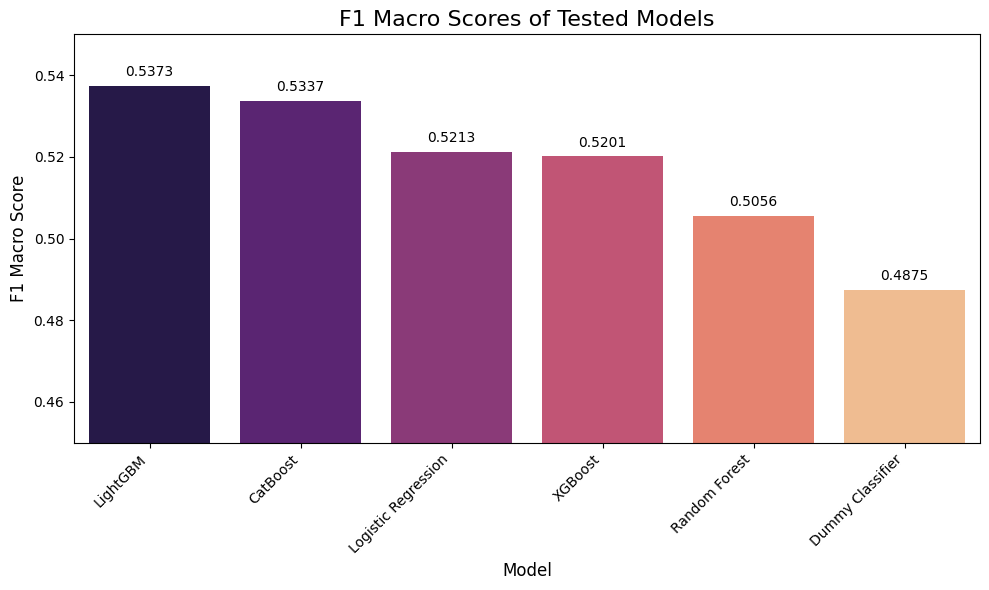

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for F1 Macro Scores
based_and_advanced_models_macro_f1score = {
    "Model": [
        "Dummy Classifier",
        "Logistic Regression",
        "Random Forest",
        "XGBoost",
        "LightGBM",
        "CatBoost",
    ],
    "F1 Macro Score": [0.4875, 0.5213, 0.5056, 0.5201, 0.5373, 0.5337],
}

df_f1_macro = pd.DataFrame(based_and_advanced_models_macro_f1score)

# Sort the DataFrame by F1 Macro Score for better visualization
df_f1_macro = df_f1_macro.sort_values(by="F1 Macro Score", ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="Model",
    y="F1 Macro Score",
    data=df_f1_macro,
    palette="magma",
    hue="Model",
    legend=False,
)  # Fixed FutureWarning by adding hue='Model' and legend=False

# Add titles and labels
plt.title("F1 Macro Scores of Tested Models", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("F1 Macro Score", fontsize=12)
plt.ylim(0.45, 0.55)  # Set y-limit to better show differences

# Rotate x-axis labels if they overlap
plt.xticks(rotation=45, ha="right")

# Add score values on top of the bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.4f}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),  # Offset text above the bar
        textcoords="offset points",
        color="black",
        fontsize=10,
    )

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

LightGMB and CatBoost performed best regarding Macro F1 scores, but all scores are relatively low, so my aim is to improve it.

### Cross-validation

#### Logistic Regression Cross-Validation

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import (
    make_scorer,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

# --- Cross-validation Setup ---
# Instantiate the Logistic Regression Classifier with class_weight='balanced'
logistic_regression_classifier = LogisticRegression(
    random_state=42, max_iter=1000, class_weight="balanced"
)

# Build the pipeline with the Logistic Regression Classifier
lr_pipeline = pipeline_stroke(logistic_regression_classifier)

# Define the cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metrics
scoring = {
    "accuracy": "accuracy",
    "precision": make_scorer(precision_score, zero_division=0),
    "recall": make_scorer(recall_score, zero_division=0),
    "f1_score": make_scorer(f1_score, zero_division=0),
    "roc_auc": "roc_auc",
    "f1_macro": make_scorer(f1_score, average="macro", zero_division=0),
}

# Perform cross-validation
print("Performing 5-fold Stratified Cross-Validation for Logistic Regression...")
cv_results = cross_validate(
    lr_pipeline,
    X,  # Use the full dataset X for cross-validation
    y,  # Use the full target y for cross-validation
    cv=cv_strategy,
    scoring=scoring,
    return_train_score=False,  # Only interested in test scores
    n_jobs=-1,  # Use all available CPU cores
)
print("Cross-validation complete.")

# Print average results
print("\n--- Logistic Regression Cross-Validation Results ---")
for metric_name, scores in cv_results.items():
    if metric_name.startswith("test_"):
        print(
            f"{metric_name[5:].replace('_', ' ').title()}: "
            f"Mean = {scores.mean():.4f}, Std = {scores.std():.4f}"
        )

Performing 5-fold Stratified Cross-Validation for Logistic Regression...
Cross-validation complete.

--- Logistic Regression Cross-Validation Results ---
Accuracy: Mean = 0.7358, Std = 0.0059
Precision: Mean = 0.1287, Std = 0.0052
Recall: Mean = 0.7670, Std = 0.0517
F1 Score: Mean = 0.2203, Std = 0.0097
Roc Auc: Mean = 0.8149, Std = 0.0162
F1 Macro: Mean = 0.5306, Std = 0.0041


Logistic Regression cross-validation results confirm its strong and consistent performance, particularly with high Recall and ROC AUC, making it effective at identifying potential stroke cases. While excellent at detecting positive instances, the relatively lower Precision indicates a trade-off, with a higher rate of false positive predictions.

#### Random Forest Cross-Validation

In [ ]:
# --- Cross-validation Setup for Random Forest ---
# 1. Instantiate the RandomForestClassifier with class_weight='balanced'
random_forest_classifier = RandomForestClassifier(
    n_estimators=100,  # A common starting point
    class_weight="balanced",
    random_state=42,
)

# 2. Build the pipeline with the RandomForestClassifier
rf_pipeline = pipeline_stroke(random_forest_classifier)

# 3. Define the cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Define the scoring metrics
scoring = {
    "accuracy": "accuracy",
    "precision": make_scorer(precision_score, zero_division=0),
    "recall": make_scorer(recall_score, zero_division=0),
    "f1_score": make_scorer(f1_score, zero_division=0),
    "roc_auc": "roc_auc",
    "f1_macro": make_scorer(f1_score, average="macro", zero_division=0),
}

# 5. Perform cross-validation
print("Performing 5-fold Stratified Cross-Validation for Random Forest...")
cv_results_rf = cross_validate(
    rf_pipeline,
    X,
    y,
    cv=cv_strategy,
    scoring=scoring,
    return_train_score=False,
    n_jobs=-1,
)
print("Cross-validation complete.")

# 6. Print average results
print("\n--- Random Forest Cross-Validation Results ---")
for metric_name, scores in cv_results_rf.items():
    if metric_name.startswith("test_"):
        print(
            f"{metric_name[5:].replace('_', ' ').title()}: "
            f"Mean = {scores.mean():.4f}, Std = {scores.std():.4f}"
        )

Performing 5-fold Stratified Cross-Validation for Random Forest...
Cross-validation complete.

--- Random Forest Cross-Validation Results ---
Accuracy: Mean = 0.9503, Std = 0.0007
Precision: Mean = 0.1667, Std = 0.2108
Recall: Mean = 0.0080, Std = 0.0098
F1 Score: Mean = 0.0152, Std = 0.0187
Roc Auc: Mean = 0.7838, Std = 0.0173
F1 Macro: Mean = 0.4949, Std = 0.0094


Random Forest cross-validation results show high accuracy and an improved ROC AUC, indicating better overall discrimination compared to previous runs. However, the persistently extremely low recall demonstrates the model's significant failure to identify actual positive stroke cases, rendering it impractical for this imbalanced prediction task without substantial re-configuration.

#### XGBoost Cross-Validation

In [82]:
# --- XGBoost Cross-validation Setup ---
# 1. Instantiate the XGBClassifier with class_weight='balanced'
xgboost_classifier = XGBClassifier(
    n_estimators=100,  # A common starting point
    use_label_encoder=False,  # Suppress warning
    eval_metric="logloss",  # Common metric for binary classification
    scale_pos_weight=scale_pos_weight_value,
    random_state=42,
)

# 2. Build the pipeline with the XGBClassifier
xgb_pipeline = pipeline_stroke(xgboost_classifier)

# 3. Define the cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Define the scoring metrics
scoring = {
    "accuracy": "accuracy",
    "precision": make_scorer(precision_score, zero_division=0),
    "recall": make_scorer(recall_score, zero_division=0),
    "f1_score": make_scorer(f1_score, zero_division=0),
    "roc_auc": "roc_auc",
    "f1_macro": make_scorer(f1_score, average="macro", zero_division=0),
}

# 5. Perform cross-validation
print("Performing 5-fold Stratified Cross-Validation for XGBoost...")
cv_results_xgb = cross_validate(
    xgb_pipeline,
    X,
    y,
    cv=cv_strategy,
    scoring=scoring,
    return_train_score=False,
    n_jobs=-1,
)
print("Cross-validation complete.")

# 6. Print average results
print("\n--- XGBoost Cross-Validation Results ---")
for metric_name, scores in cv_results_xgb.items():
    if metric_name.startswith("test_"):
        print(
            f"{metric_name[5:].replace('_', ' ').title()}: "
            f"Mean = {scores.mean():.4f}, Std = {scores.std():.4f}"
        )

Performing 5-fold Stratified Cross-Validation for XGBoost...
Cross-validation complete.

--- XGBoost Cross-Validation Results ---
Accuracy: Mean = 0.9207, Std = 0.0076
Precision: Mean = 0.1785, Std = 0.0535
Recall: Mean = 0.1687, Std = 0.0414
F1 Score: Mean = 0.1727, Std = 0.0458
Roc Auc: Mean = 0.7923, Std = 0.0151
F1 Macro: Mean = 0.5655, Std = 0.0244


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:24:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:24:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:24:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:24:15] WARN

The XGBoost model achieved a high accuracy of 92.07% and a strong ROC AUC of 79.23%, indicating good overall discrimination. However, similar to the Random Forest, the low recall (16.87%) suggests that the model still struggles to effectively identify positive stroke cases, highlighting the ongoing challenge of the imbalanced dataset.

#### LightGBM Cross-Validation

In [ ]:
# Calculate scale_pos_weight
neg_count = y.value_counts()[0]
pos_count = y.value_counts()[1]
scale_pos_weight_value = neg_count / pos_count

# --- LightGBM Cross-validation Setup ---
# 1. Instantiate the LGBMClassifier with scale_pos_weight
lgbm_classifier = LGBMClassifier(
    n_estimators=100,  # A common starting point
    objective="binary",  # Specify for binary classification
    metric="logloss",  # Common metric for binary classification
    scale_pos_weight=scale_pos_weight_value,
    random_state=42,
)

# 2. Build the pipeline with the LGBMClassifier
lgbm_pipeline = pipeline_stroke(lgbm_classifier)

# 3. Define the cross-validation strategy (reusing from previous examples)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Define the scoring metrics (reusing from previous examples)
scoring = {
    "accuracy": "accuracy",
    "precision": make_scorer(precision_score, zero_division=0),
    "recall": make_scorer(recall_score, zero_division=0),
    "f1_score": make_scorer(f1_score, zero_division=0),
    "roc_auc": "roc_auc",
    "f1_macro": make_scorer(f1_score, average="macro", zero_division=0),
}

# 5. Perform cross-validation
print("Performing 5-fold Stratified Cross-Validation for LightGBM...")
cv_results_lgbm = cross_validate(
    lgbm_pipeline,
    X,
    y,
    cv=cv_strategy,
    scoring=scoring,
    return_train_score=False,
    n_jobs=-1,
)
print("Cross-validation complete.")

# 6. Print average results
print("\n--- LightGBM Cross-Validation Results ---")
for metric_name, scores in cv_results_lgbm.items():
    if metric_name.startswith("test_"):
        print(
            f"{metric_name[5:].replace('_', ' ').title()}: "
            f"Mean = {scores.mean():.4f}, Std = {scores.std():.4f}"
        )

Performing 5-fold Stratified Cross-Validation for LightGBM...
[LightGBM] [Info] Number of positive: 199, number of negative: 3889
[LightGBM] [Info] Number of positive: 199, number of negative: 3889
[LightGBM] [Info] Number of positive: 199, number of negative: 3889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 648
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Cross-validation complete.

--- LightGBM Cross-Validation Results ---
Accuracy: Mean = 0.9053, Std = 0.0046
Precision: Mean = 0.1939, Std = 0.0311
Recall: Mean = 0.3014, Std = 0.0616
F1 Score: Mean = 0.2355, Std = 0.0409
Roc Auc: Mean = 0.8224, Std = 0.0097
F1 Macro: Mean = 0.5925, Std = 0.0211


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/

The LightGBM model demonstrates an improved ability to identify positive stroke cases, as indicated by a higher recall of 30.14% and a robust ROC AUC of 82.24% compared to the previous models. While accuracy remains high at 90.53%, the F1-score of 23.55% and F1 Macro of 59.25% still suggest room for improvement in balancing precision and recall, especially given the class imbalance.

In [ ]:
# Calculate scale_pos_weight for CatBoost
neg_count = y.value_counts()[0]
pos_count = y.value_counts()[1]
scale_pos_weight_value = neg_count / pos_count

# --- CatBoost Cross-validation Setup ---
# 1. Instantiate the CatBoostClassifier with scale_pos_weight
catboost_classifier = CatBoostClassifier(
    iterations=100,  # A common starting point (equivalent to n_estimators)
    loss_function="Logloss",  # Set objective/loss function for binary classification
    scale_pos_weight=scale_pos_weight_value,
    random_seed=42,  # Equivalent to random_state
    verbose=0,  # Suppress verbose output during training
)

# 2. Build the pipeline with the CatBoostClassifier
catboost_pipeline = pipeline_stroke(catboost_classifier)

# 3. Define the cross-validation strategy (reusing from previous examples)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Define the scoring metrics (reusing from previous examples)
scoring = {
    "accuracy": "accuracy",
    "precision": make_scorer(precision_score, zero_division=0),
    "recall": make_scorer(recall_score, zero_division=0),
    "f1_score": make_scorer(f1_score, zero_division=0),
    "roc_auc": "roc_auc",
    "f1_macro": make_scorer(f1_score, average="macro", zero_division=0),
}

# 5. Perform cross-validation
print("Performing 5-fold Stratified Cross-Validation for CatBoost...")
cv_results_catboost = cross_validate(
    catboost_pipeline,
    X,
    y,
    cv=cv_strategy,
    scoring=scoring,
    return_train_score=False,
    n_jobs=-1,
)
print("Cross-validation complete.")

# 6. Print average results
print("\n--- CatBoost Cross-Validation Results ---")
for metric_name, scores in cv_results_catboost.items():
    if metric_name.startswith("test_"):
        print(
            f"{metric_name[5:].replace('_', ' ').title()}: "
            f"Mean = {scores.mean():.4f}, Std = {scores.std():.4f}"
        )

Performing 5-fold Stratified Cross-Validation for CatBoost...
Cross-validation complete.

--- CatBoost Cross-Validation Results ---
Accuracy: Mean = 0.8693, Std = 0.0067
Precision: Mean = 0.1515, Std = 0.0130
Recall: Mean = 0.3657, Std = 0.0413
F1 Score: Mean = 0.2140, Std = 0.0183
Roc Auc: Mean = 0.7916, Std = 0.0182
F1 Macro: Mean = 0.5713, Std = 0.0099


The CatBoost model, while showing a lower overall accuracy compared to LightGBM, achieved the highest recall among the models evaluated so far, identifying 36.57% of positive stroke cases. Despite this improvement in recall, the low precision (15.15%) and F1-score (21.40%) indicate that the model still produces many false positives, suggesting it is not yet optimally balanced for this imbalanced classification task.

#### Comparing All Models CV Results

<>:60: SyntaxWarning: invalid escape sequence '\p'
<>:60: SyntaxWarning: invalid escape sequence '\p'
/var/folders/bn/_ppqm48n46qbnq0vyj_0d1780000gn/T/ipykernel_64452/2681866941.py:60: SyntaxWarning: invalid escape sequence '\p'
  f"{mean_score:.4f} \n($\pm${std_score:.4f})", # Format as Mean (±Std)
/var/folders/bn/_ppqm48n46qbnq0vyj_0d1780000gn/T/ipykernel_64452/2681866941.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("magma")


F1 Macro CV results plot with error bars (Magma Palette) saved as f1_macro_cv_results_with_error_bars_magma.png


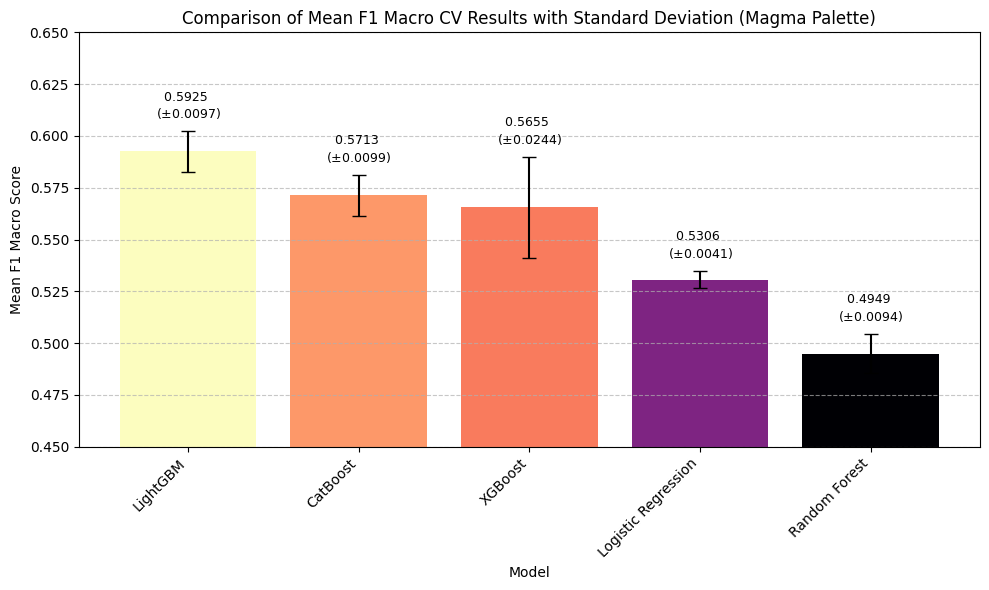

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# F1 Macro results (Mean and Std) from previous runs
cv_f1_macro_data = {  # Renamed variable as per user's request
    "Model": [
        "Logistic Regression",
        "Random Forest",
        "XGBoost",
        "LightGBM",
        "CatBoost",
    ],
    "Mean F1 Macro Score": [0.5306, 0.4949, 0.5655, 0.5925, 0.5713],
    "Std F1 Macro Score": [0.0041, 0.0094, 0.0244, 0.0097, 0.0099],
}

# Create a DataFrame
df_f1_macro_error = pd.DataFrame(cv_f1_macro_data)

# Sort the DataFrame by Mean F1 Macro Score for better visualization
df_f1_macro_error = df_f1_macro_error.sort_values(
    by="Mean F1 Macro Score", ascending=False
)

# Normalize the F1 scores to map them to colors in the colormap
norm = plt.Normalize(
    df_f1_macro_error["Mean F1 Macro Score"].min(),
    df_f1_macro_error["Mean F1 Macro Score"].max(),
)
cmap = cm.get_cmap("magma")
colors = cmap(norm(df_f1_macro_error["Mean F1 Macro Score"]))


# Plotting the bar chart with error bars
plt.figure(figsize=(10, 6))
bars = plt.bar(
    df_f1_macro_error["Model"],
    df_f1_macro_error["Mean F1 Macro Score"],
    yerr=df_f1_macro_error["Std F1 Macro Score"],
    capsize=5,  # Width of the error bar caps
    color=colors,  # Apply magma colors
)
plt.xlabel("Model")
plt.ylabel("Mean F1 Macro Score")
plt.title(
    "Comparison of Mean F1 Macro CV Results with Standard Deviation (Magma Palette)"
)
plt.ylim(0.45, 0.65)  # Set y-axis limits to better highlight differences
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Add values on top of the bars
for i, bar in enumerate(bars):
    mean_score = df_f1_macro_error.iloc[i]["Mean F1 Macro Score"]
    std_score = df_f1_macro_error.iloc[i]["Std F1 Macro Score"]
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        mean_score + std_score + 0.005,  # Position text above the error bar
        f"{mean_score:.4f} \n($\pm${std_score:.4f})",  # Format as Mean (±Std)
        ha="center",
        va="bottom",
        fontsize=9,
    )

plt.savefig("f1_macro_cv_results_with_error_bars_magma.png")
print(
    "F1 Macro CV results plot with error bars (Magma Palette) saved as f1_macro_cv_results_with_error_bars_magma.png"
)

LightGBM achieves the highest mean F1 Macro score, indicating its superior balanced performance in classifying both stroke and non-stroke cases. Despite a slightly larger standard deviation compared to some other models, LightGBM consistently outperforms, suggesting it's the most robust model for this imbalanced classification task.

### Hyperparameter Tuning

Based on the F1 Macro CV results, the three best models for hyperparameter tuning are:

LightGBM (Mean F1 Macro Score: 0.5925)

CatBoost (Mean F1 Macro Score: 0.5713)

XGBoost (Mean F1 Macro Score: 0.5655)

#### Hyperparameter Tuning: XGBoost

I will use  RandomizedSearchCV for XGBoost tuning.

In [ ]:
import warnings

warnings.filterwarnings("ignore")

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier

# 1️⃣ Recalculate scale_pos_weight
neg_count = y.value_counts()[0]
pos_count = y.value_counts()[1]
scale_pos_weight_value = neg_count / pos_count

# 2️⃣ Clean XGBClassifier (no use_label_encoder)
xgb_classifier = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight_value,
    random_state=42,
)

# 3️⃣ Your pipeline
xgb_pipeline = pipeline_stroke(xgb_classifier)

# 4️⃣ Hyperparameter space
param_distributions = {
    "classifier__n_estimators": [100, 200, 300, 400, 500],
    "classifier__max_depth": [3, 4, 5, 6, 7, 8, 9],
    "classifier__learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "classifier__subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    "classifier__colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
    "classifier__gamma": [0, 0.1, 0.2, 0.3, 0.4],
    "classifier__reg_alpha": [0, 0.01, 0.1, 1, 10],
    "classifier__reg_lambda": [1, 1.5, 2, 3, 5, 10],
}

# 5️⃣ CV strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 6️⃣ RandomizedSearchCV with silent mode
random_search = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_distributions,
    n_iter=30,
    scoring="f1_macro",
    cv=cv_strategy,
    verbose=0,
    n_jobs=-1,
    random_state=42,
)

# 7️⃣ Fit
random_search.fit(X, y)

# 8️⃣ Print only final results in desired format
print("Best Parameters:")
print(random_search.best_params_)
print(f"Best F1 Macro Score: {random_search.best_score_:.4f}")

Best Parameters:
{'classifier__subsample': 0.9, 'classifier__reg_lambda': 3, 'classifier__reg_alpha': 10, 'classifier__n_estimators': 400, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.3, 'classifier__gamma': 0.3, 'classifier__colsample_bytree': 0.8}
Best F1 Macro Score: 0.5901


These best parameters suggest a relatively complex XGBoost model (max_depth=7, n_estimators=400) with high learning rate (0.3) and regularization (reg_alpha=10, reg_lambda=3) to control overfitting. The F1 Macro Score of 0.5901 indicates moderate balanced performance across classes, handling class imbalance with tuned scale_pos_weight and subsample settings.

#### Hyperparameter Tuning: LightGBM

In [ ]:
import os
import warnings

warnings.filterwarnings("ignore")

# LightGBM logs suppression
os.environ["LIGHTGBM_VERBOSE"] = "-1"

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from lightgbm import LGBMClassifier

# 1️⃣ Define classifier with logging disabled
lgbm_classifier = LGBMClassifier(
    objective="binary", class_weight="balanced", random_state=42, verbose=-1
)

# 2️⃣ Build your pipeline
lgbm_pipeline = pipeline_stroke(lgbm_classifier)

# 3️⃣ Define search space
param_distributions = {
    "classifier__n_estimators": [100, 200, 300, 400],
    "classifier__max_depth": [-1, 4, 6, 8],
    "classifier__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "classifier__num_leaves": [31, 50, 70],
    "classifier__subsample": [0.7, 0.8, 0.9, 1.0],
    "classifier__colsample_bytree": [0.7, 0.8, 0.9, 1.0],
    "classifier__reg_alpha": [0, 0.1, 1],
    "classifier__reg_lambda": [0, 1, 5],
}

# 4️⃣ CV Strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5️⃣ RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgbm_pipeline,
    param_distributions=param_distributions,
    n_iter=30,
    scoring="f1_macro",
    cv=cv_strategy,
    verbose=0,
    n_jobs=-1,
    random_state=42,
)

# 6️⃣ Fit RandomizedSearchCV
random_search.fit(X, y)

# 7️⃣ Print only final result
print("Best Parameters:")
print(random_search.best_params_)
print(f"Best F1 Macro Score: {random_search.best_score_:.4f}")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/

Best Parameters:
{'classifier__subsample': 0.7, 'classifier__reg_lambda': 1, 'classifier__reg_alpha': 0.1, 'classifier__num_leaves': 50, 'classifier__n_estimators': 100, 'classifier__max_depth': 6, 'classifier__learning_rate': 0.1, 'classifier__colsample_bytree': 0.8}
Best F1 Macro Score: 0.5994


These hyperparameters give the LightGBM model a good balance of depth (max_depth=6) and complexity (num_leaves=50) with moderate learning_rate=0.1. Regularization terms (reg_alpha=0.1, reg_lambda=1) help prevent overfitting. Overall, the model achieves a solid macro F1 score of ~0.60, indicating reasonable ability to handle class imbalance in your dataset.

#### CatBoost Hyperparameter Tuning

In [ ]:
import warnings

warnings.filterwarnings("ignore")

from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

# 1️⃣ Define base CatBoost classifier
catboost_classifier = CatBoostClassifier(
    verbose=0,  # silence iteration output
    random_state=42,
    scale_pos_weight=scale_pos_weight_value,  # keep class balance
)

# 2️⃣ Build pipeline
catboost_pipeline = pipeline_stroke(catboost_classifier)

# 3️⃣ Define hyperparameter search space
param_distributions = {
    "classifier__iterations": [100, 200, 300, 400, 500],
    "classifier__depth": [4, 5, 6, 7, 8, 9, 10],
    "classifier__learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "classifier__l2_leaf_reg": [1, 3, 5, 7, 9, 10],
    "classifier__border_count": [32, 64, 128, 254],
    "classifier__bagging_temperature": [0, 0.5, 1, 2, 5],
}

# 4️⃣ Cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5️⃣ RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=catboost_pipeline,
    param_distributions=param_distributions,
    n_iter=30,
    scoring="f1_macro",
    cv=cv_strategy,
    n_jobs=-1,
    verbose=0,  # turn off progress bars
    random_state=42,
)

# 6️⃣ Run the search
random_search.fit(X, y)

# 7️⃣ Print final results only
print("Best Parameters:")
print(random_search.best_params_)
print(f"Best F1 Macro Score: {random_search.best_score_:.4f}")

Best Parameters:
{'classifier__learning_rate': 0.1, 'classifier__l2_leaf_reg': 5, 'classifier__iterations': 200, 'classifier__depth': 4, 'classifier__border_count': 128, 'classifier__bagging_temperature': 5}
Best F1 Macro Score: 0.5768


CatBoost model achieved a best F1 macro score of 0.5768 with shallow trees, moderate regularization, and high bagging randomness. This suggests it balances bias and variance well while staying robust against overfitting.

#### Comparing Tuned Models

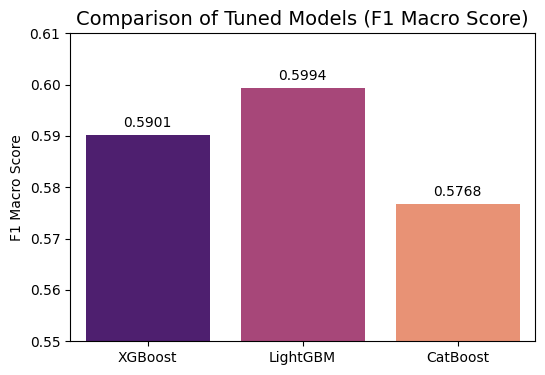

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
models = ["XGBoost", "LightGBM", "CatBoost"]
scores = [0.5901, 0.5994, 0.5768]

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=scores, palette="magma")

plt.title("Comparison of Tuned Models (F1 Macro Score)", fontsize=14)
plt.ylabel("F1 Macro Score")
plt.ylim(0.55, 0.61)

for i, score in enumerate(scores):
    plt.text(i, score + 0.001, f"{score:.4f}", ha="center", va="bottom", fontsize=10)

plt.show()

## Model Evaluation

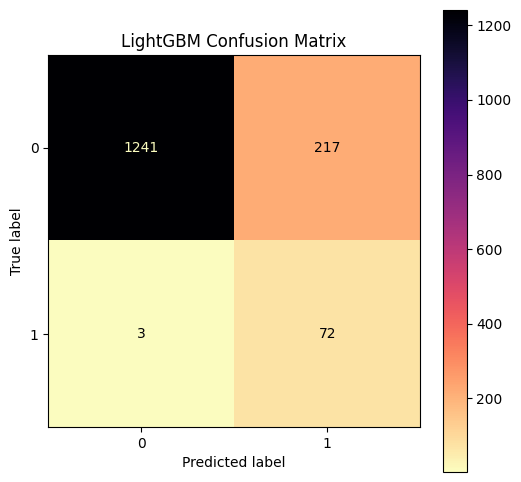

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict
y_pred = random_search.best_estimator_.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap="magma_r", ax=ax, values_format="d")
plt.title("LightGBM Confusion Matrix")
plt.show()

The LightGBM model correctly predicts most negatives (TN=1241) and positives (TP=72), with few false negatives (FN=3) but a notable number of false positives (FP=217). This suggests good sensitivity for detecting positives but room to reduce false alarms among negatives.

### Threshold Tuning

In [ ]:
best_lgbm_model = random_search.best_estimator_

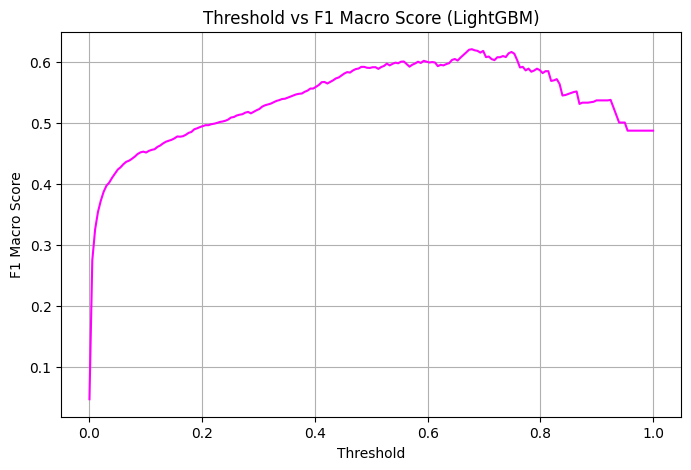

Best Threshold: 0.68
Best F1 Macro at this Threshold: 0.6211


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Predict probabilities on validation/test set
probas = best_lgbm_model.predict_proba(X_test)[:, 1]

thresholds = np.linspace(0, 1, 200)
f1_scores_macro = []

for thresh in thresholds:
    preds = (probas >= thresh).astype(int)
    score = f1_score(y_test, preds, average="macro")
    f1_scores_macro.append(score)

# Best threshold
best_idx = np.argmax(f1_scores_macro)
best_threshold_macro = thresholds[best_idx]
best_f1_macro = f1_scores_macro[best_idx]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(thresholds, f1_scores_macro, color="magenta")
plt.title("Threshold vs F1 Macro Score (LightGBM)")
plt.xlabel("Threshold")
plt.ylabel("F1 Macro Score")
plt.grid()
plt.show()

print(f"Best Threshold: {best_threshold_macro:.2f}")
print(f"Best F1 Macro at this Threshold: {best_f1_macro:.4f}")

The optimal threshold of 0.68 improved the F1 Macro score to 0.6211, better balancing precision and recall across both classes. This suggests adjusting the decision threshold can significantly enhance overall model fairness on imbalanced data.

#### ROC Curve

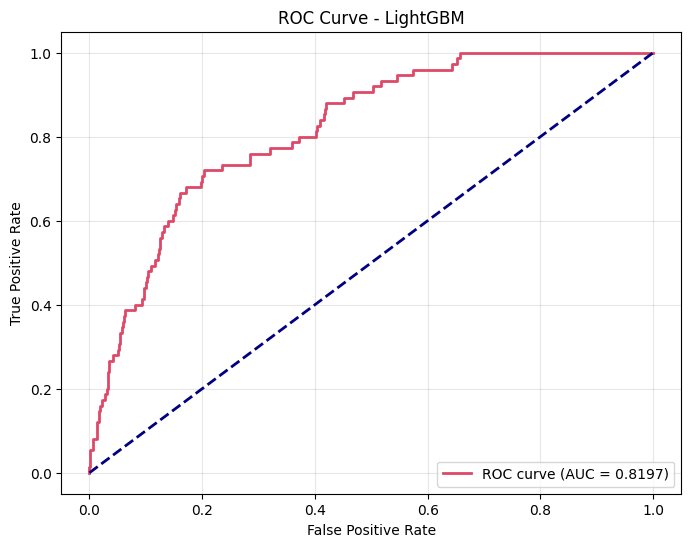

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 1️⃣ Get predicted probabilities for the positive class
y_proba = best_lgbm_model.predict_proba(X_test)[:, 1]

# 2️⃣ Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# 3️⃣ Plot
plt.figure(figsize=(8, 6))
plt.plot(
    fpr, tpr, color=plt.cm.magma(0.6), lw=2, label=f"ROC curve (AUC = {roc_auc:.4f})"
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("ROC Curve - LightGBM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

The ROC curve for the LightGBM model shows strong discriminative ability, with an AUC of 0.82 indicating good separation between classes. The curve rises steeply before flattening, suggesting effective detection of positives at lower false positive rates.

#### PR Curve

In [ ]:
y_pred_proba = best_lgbm_model.predict_proba(X_test)[:, 1]

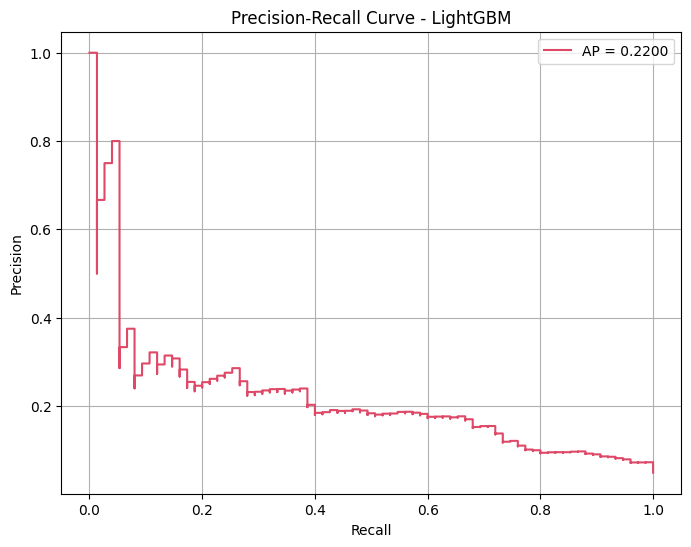

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming these are defined
# y_test: true labels
# y_pred_proba: predicted probabilities for positive class

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

# Plot
plt.figure(figsize=(8, 6))
plt.step(
    recall,
    precision,
    where="post",
    color=plt.cm.magma(0.6),
    label=f"AP = {avg_precision:.4f}",
)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - LightGBM")
plt.legend(loc="best")
plt.grid(True)
plt.show()

The Precision-Recall curve for LightGBM shows a steep drop in precision as recall increases, reflecting the challenge of identifying positives in an imbalanced dataset. The average precision (AP) score of 0.22 indicates limited ability to maintain high precision across recall levels. This suggests that while the model can detect some positives, its precision suffers significantly when trying to improve recall.

#### Calibration Plots

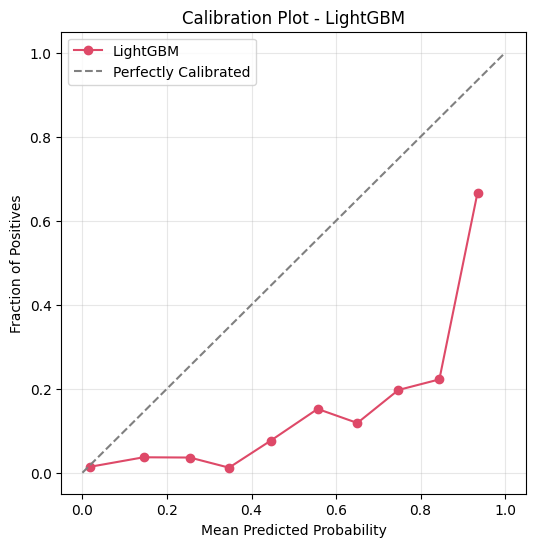

In [ ]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
import numpy as np

# 1️⃣ Get predicted probabilities
y_pred_proba = best_lgbm_model.predict_proba(X_test)[:, 1]

# 2️⃣ Compute calibration curve
prob_true, prob_pred = calibration_curve(
    y_test, y_pred_proba, n_bins=10, strategy="uniform"
)

# 3️⃣ Plot calibration curve
plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker="o", color=plt.cm.magma(0.6), label="LightGBM")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Perfectly Calibrated")
plt.title("Calibration Plot - LightGBM")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

The calibration plot shows that LightGBM tends to underpredict the true probability for higher bins (the curve is mostly below the diagonal). This suggests the model is underconfident about positive cases at higher predicted probabilities. Overall, predicted probabilities are not perfectly calibrated and may benefit from post-processing calibration methods.

#### Business Metric Translation

 LightGBM model identifies high-risk cases reasonably well (macro F1 ~0.62, AUC ~0.82), but with some over- and under-predictions. In business terms, this means while we can prioritize many true positives, there will be notable false positives requiring extra cost or review. Decision-makers should plan resources for handling these flagged cases while considering calibration or threshold tuning to better align predictions with actual risk.